# DSC 305A Final Project: Customer Segmentation

Name: Susmita Poudel  
DSC 305A 23   
Final Project: Customer Segmentation


## Problem
Our goal in this project is to divide our customer population into different groups, where the customer in each group are most similar to each other. We will be performing clustering algorithm to divide the customers into different clusters and analyze each cluster. The cluster analysis will help us to make business recommendations, target customers based on product, provide better customer service, and much more.


## Objectives
In this lab, I have performed unsupervised machine learning modeling on my dataset.

The purpose of this lab is to help me:  
1)gain experience with unsupervised machine learning by applying to a real-world scenario.  
2)learn about different types of unsupervised machine learning algorithm such as K-means, Agglomerative, etc.  
3)practice feature generation  
4)analyze results through data visualization  
5)perform dimension reudction.  



## Import Libraries

In [1]:
import random
import numpy as np
import pandas as pd
import datetime
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

from matplotlib.colors import ListedColormap
from sklearn import metrics


## Import the dataset

We are using a dataset from a grocery store, which is in csv form. The dataset has information regarding the customers that have been shopping there between 2012-2014.

In [2]:
#Read the csv file
data = pd.read_csv("marketing_campaign.csv", sep='\t')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Exploratory Data Analysis

Before trying to build a model, we need to learn extensively about our dataset.In this section, we will be getting the basic information about our dataset to understand the dataset better. 

In [3]:
#Get No. of rows and columns 
data.shape

(2240, 29)

In [4]:
#Get the column names, and the data type for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#check missing values
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

We have missing value only in the income column. I decided to drop the rows with missing income. I do not think replacing the income with mean or median is a good idea especailly because we have no additional information on the factors that is affecting the income for this dataset.

In [6]:
#dropping the row with missing values
data = data.dropna()
print(f'Updated no. of rows: {len(data)}')

Updated no. of rows: 2216


In [7]:
#Checking if there are any duplicated 
data.drop_duplicates(subset = None, inplace = False, ignore_index = False)

#No duplicated value in our dataset
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Prepare data for model building

For our customers,we have year of birth. I am changing it to age in years instead, so it would be easier for me to analyze later. I am using the current year (2023) to calculate the age of customers. I am adding a new column called Age to store this data.

In [8]:
data['Age'] = datetime.datetime.now().year - data['Year_Birth'] 
data['Age']

/var/folders/dn/rdf6dkk51ps__wbzt2xk4d100000gn/T/ipykernel_71644/319916823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = datetime.datetime.now().year - data['Year_Birth']


0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2216, dtype: int64

 In our dataset, we have the date when the customers started shopping from this grocery store. I thought it would be easier for me to parse time in years instead of complete date. So I created a new column called Years_Since_Registration by subtracting the date when the customer started shopping from the current year.

In [9]:
def get_different_year():
    registration_year = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y').apply(lambda x: x.year)
    current_year = datetime.datetime.now().year
    return current_year - registration_year

data['Years_Since_Registration'] = get_different_year()  # Number of years since customer registration

/var/folders/dn/rdf6dkk51ps__wbzt2xk4d100000gn/T/ipykernel_71644/2083974035.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Years_Since_Registration'] = get_different_year()  # Number of years since customer registration


In [10]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Years_Since_Registration
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,66,11
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,69,9
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,58,10
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,39,9
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,42,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,56,10
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,77,9
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,42,9
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,67,9


## Encoding categorical variales
__In this section, I will be changing my categorical data into numerical data. The columns Education and Marital Status are the only categorical columns in my dataset. In order to change them into numerical data, I will first find out the unique value in each column.__

In [11]:
#Encoding Education variable
data['Education'].value_counts()
data["Education"] = data["Education"].replace({"Basic": 0, "Graduation": 1, "2n Cycle": 2, "Master": 2, "PhD": 3})

/var/folders/dn/rdf6dkk51ps__wbzt2xk4d100000gn/T/ipykernel_71644/2664701187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Education"] = data["Education"].replace({"Basic": 0, "Graduation": 1, "2n Cycle": 2, "Master": 2, "PhD": 3})


In [12]:
#Encoding the  marital statuts  variable
data['Marital_Status'].value_counts()
data['Marital_Status'] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone",
    "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

data['Marital_Status'] = data['Marital_Status'].replace({'Alone': 0, 'Partner': 1})

/var/folders/dn/rdf6dkk51ps__wbzt2xk4d100000gn/T/ipykernel_71644/2632059429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Marital_Status'] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone",
/var/folders/dn/rdf6dkk51ps__wbzt2xk4d100000gn/T/ipykernel_71644/2632059429.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Marital_Status'] = data['Marital_Status'].replace({'Alone': 0, 'Partner': 1})


In [13]:
#Adding a column Spent that gives us total expenditure for each customer
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

/var/folders/dn/rdf6dkk51ps__wbzt2xk4d100000gn/T/ipykernel_71644/2667161915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]


In our dataset, we have the data for few products but there naming is unnecessarily confusing. Hence, I am changing the names to clearer version for better understanding.

In [14]:
#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

__Feature Generation__   
I am adding a new column called total purchases. I will be adding the individual purchases made by each customer at the store via different modes.

I am also adding a new column Children to indicate the number of children each customer has by using the columns teenhome and kidhome. I am doing this to analyze my cluster and get a general idea of how each cluster is formed.

In [15]:

data['Total_Purchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']
data['Children'] = data['Kidhome'] + data['Teenhome']


I am dropping the columns that are not redundant after feature generation as well as columns that I do not intend to use for my modeling.

In [16]:
data = data.drop(columns=['ID','Year_Birth', 'Dt_Customer', 'Z_CostContact','Z_Revenue', 'Kidhome', 'Teenhome'])

In [17]:
data

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Since_Registration,Spent,Total_Purchases,Children
0,1,0,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,1,66,11,1617,22,0
1,1,0,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,69,9,27,4,2
2,1,1,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,58,10,776,20,0
3,1,1,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,39,9,53,6,1
4,3,1,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,42,9,422,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,1,61223.0,46,709,43,182,42,118,247,...,0,0,0,0,0,56,10,1341,16,1
2236,3,1,64014.0,56,406,0,30,0,0,8,...,0,1,0,0,0,77,9,444,15,3
2237,1,0,56981.0,91,908,48,217,32,12,24,...,0,0,0,0,0,42,9,1241,18,0
2238,2,1,69245.0,8,428,30,214,80,30,61,...,0,0,0,0,0,67,9,843,21,1


In [18]:
#A general overwiew of my data distribution
data.describe()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Since_Registration,Spent,Total_Purchases,Children
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1.664711,0.645307,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073105,0.064079,0.013538,0.009477,0.150271,54.179603,9.971570,607.075361,12.557310,0.947202
std,0.840262,0.478528,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,0.685618,602.900476,7.204611,0.749062
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,9.000000,5.000000,0.000000,0.000000
25%,1.000000,0.000000,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,10.000000,69.000000,6.000000,0.000000
50%,1.000000,1.000000,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,10.000000,396.500000,12.000000,1.000000
75%,2.000000,1.000000,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,10.000000,1048.000000,18.000000,1.000000
max,3.000000,1.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000,11.000000,2525.000000,32.000000,3.000000


## Data visualization

We will be using some plots to visualize the relationship among variables.

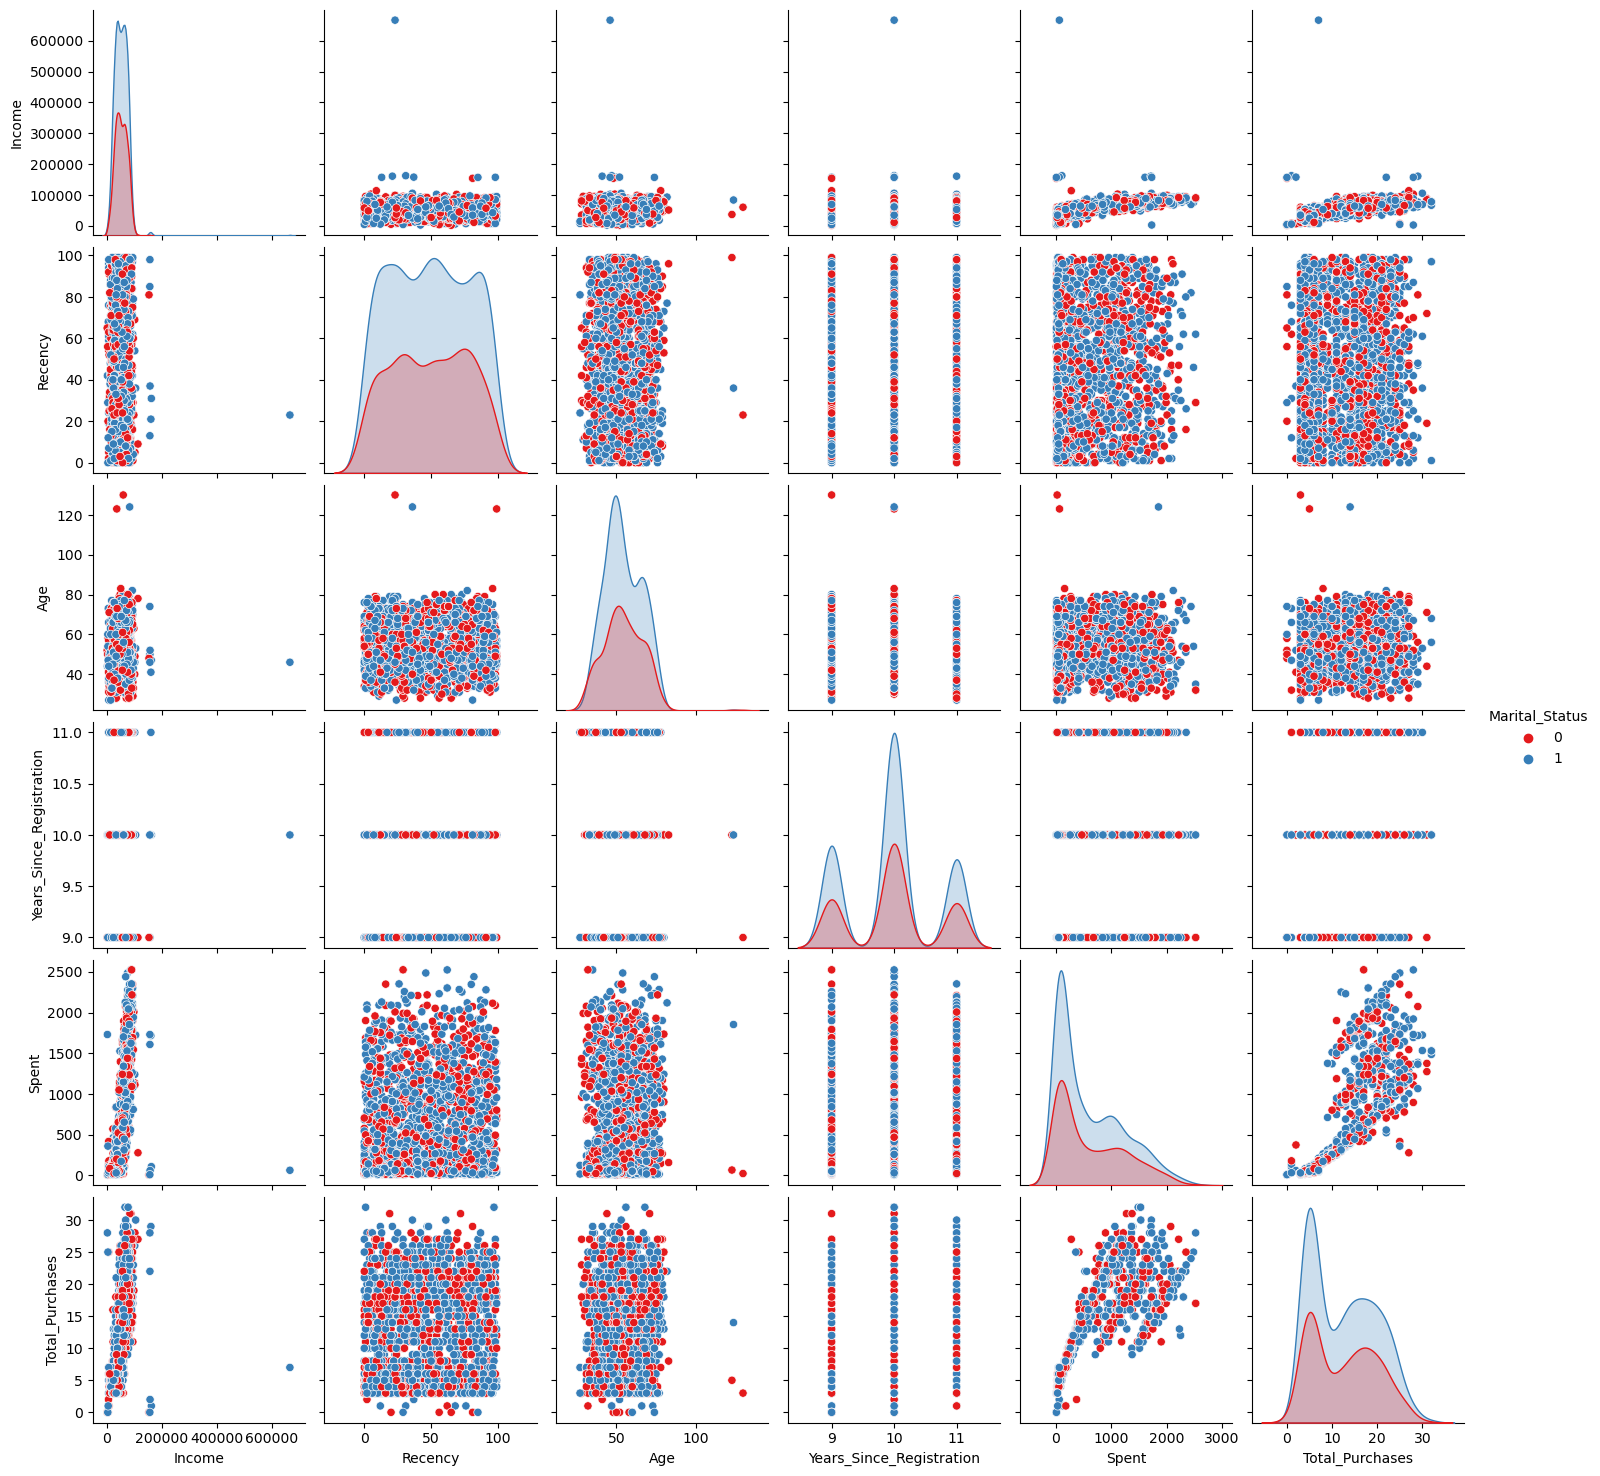

In [19]:
#Pairplot

to_plot = ['Income', 'Recency', 'Age', 'Years_Since_Registration', 'Spent',
           'Total_Purchases', 'Marital_Status']
sns.pairplot(data[to_plot], hue='Marital_Status', palette='Set1')
plt.show()

We can see from the pairplot above that we have some outliers in the age and income column that might later on affect our results. Hence, I am dropping them to hopefully have less biases on my results.

In [20]:
#Dropping the outliers by setting a max on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


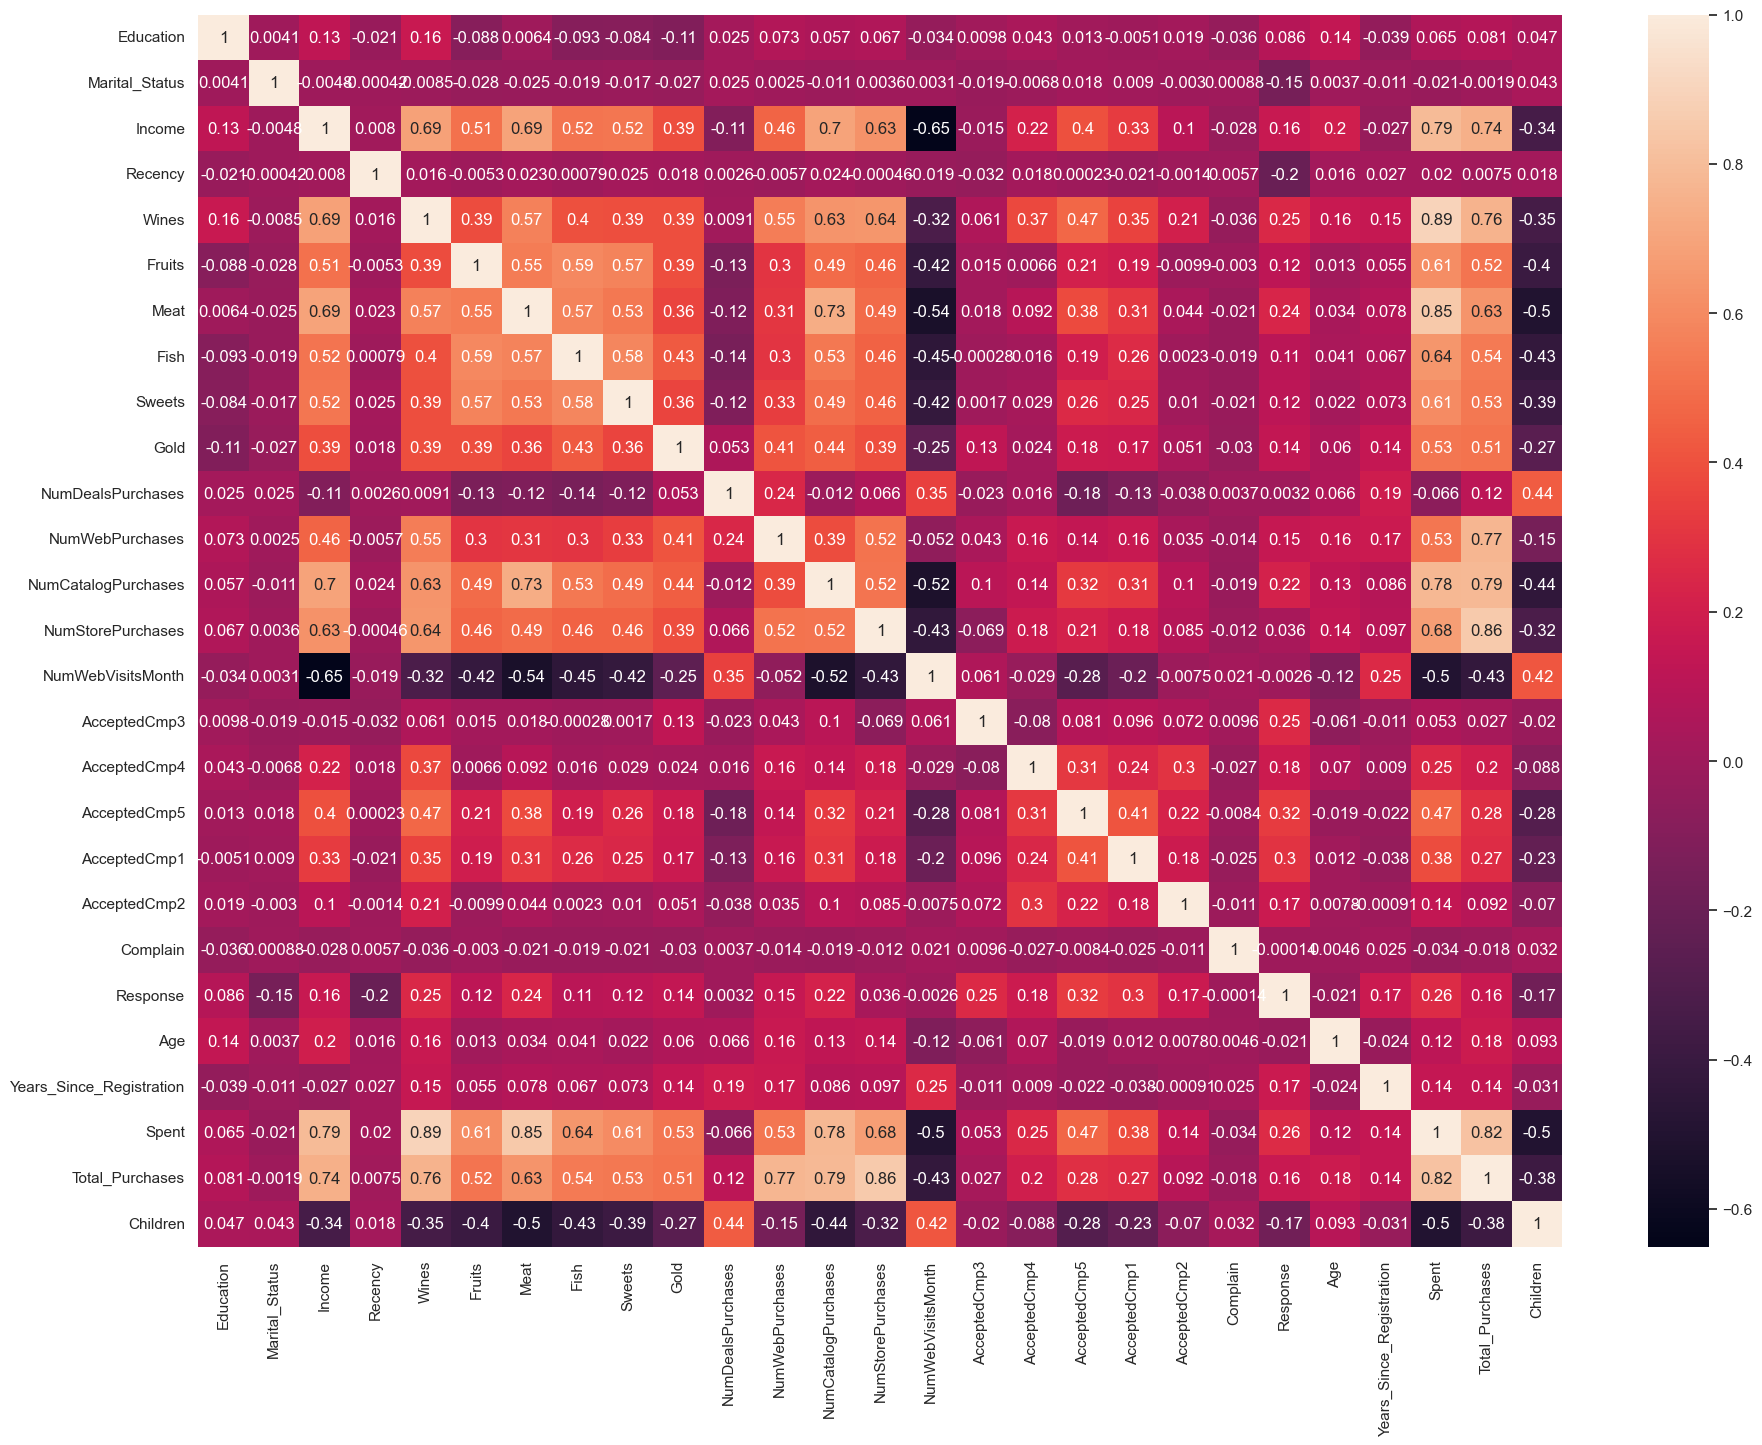

In [21]:
# Heatmap to learn about corelation among different variables
#The colors on the heat map represent the correlation between the two continuous random variables. 
#Darker colors indicate a stronger correlation, while lighter colors indicate a weaker correlation.
#The correlation is calculated using Pearson's correlation coefficient and ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation).

sns.set(rc={'figure.figsize':(22,16)})
sns.heatmap(data.corr(), annot=True)
plt.show()

## Data Scaling
We are done with data processing at this point. Now we will prepare for model builidng.

In [22]:
# Using Standard Scaling
#Creating a copy of data
df = data.copy()
#dropping the features on deals accepted and promotions because we want to cluster on basis of customer characteristics.
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df = df.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )
print("All features are now scaled")

All features are now scaled


In [23]:
scaled_df.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_Since_Registration,Spent,Total_Purchases,Children
0,-0.790438,-1.349603,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.018352,1.499086,1.676245,1.309461,-1.264598
1,-0.790438,-1.349603,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,-1.417341,-0.963297,-1.189221,1.404572
2,-0.790438,0.740959,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,0.334530,0.040872,0.280110,1.031830,-1.264598
3,-0.790438,0.740959,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.289547,-1.417341,-0.920135,-0.911590,0.069987
4,1.590024,0.740959,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-1.033114,-1.417341,-0.307562,0.198936,0.069987


## Dimensionality Reduction

There are many features in our dataset that will affect our final classication. However, many of these features are redundant, so I am performing the dimenion reduction to increase intrepretability but also minimize information loss. There are many ways for dimensionality reduction. But I will be performing Principal Component Analysis (PCA), which is commonly used as well as discussed in our lectures.

In [24]:
#Initiating PCA to reduce dimentions to 3
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["Pcol1","Pcol2", "Pcol3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pcol1,2212.0,7.809706e-17,2.800814,-5.509046,-2.640226,-0.711315,2.454228,7.472098
Pcol2,2212.0,2.097980e-17,1.413947,-3.714343,-0.998289,-0.235574,0.867453,5.696355
Pcol3,2212.0,8.733219e-18,1.188586,-3.701388,-0.800794,0.038675,0.810052,4.588743


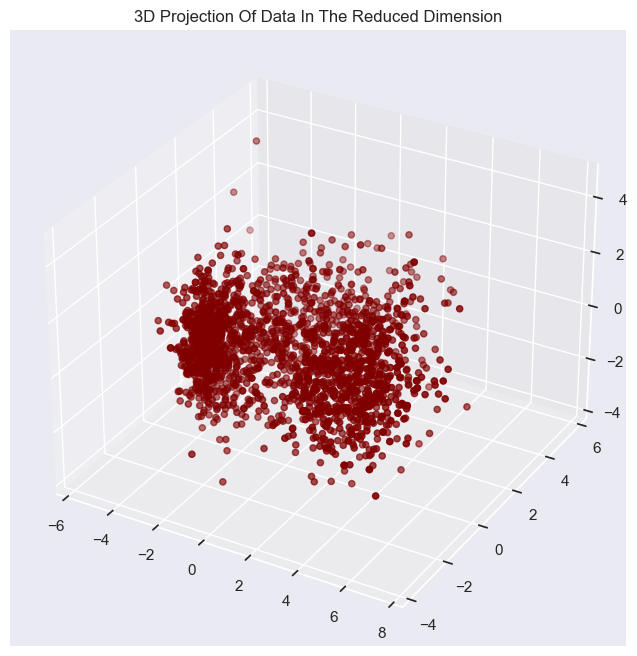

In [25]:
#A 3D Projection Of Our Data In The Reduced Dimension
x =PCA_df["Pcol1"]
y =PCA_df["Pcol2"]
z =PCA_df["Pcol3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("3D Projection Of Data In The Reduced Dimension")
plt.show()


# Clustering/ Modeling

Now, we will be performing Agglomerative clustering to our reduced data. I was considering using KMeans or Agglomerative clustering initially. I decided to go with Agglomerative clustering because for my dataset, I felt that it would be a better way as it groups datapoints on basis of similarities.

I am trying to find the suitable number of clusters on the basis of silhouette score metric. Silhouttee score is a good metric for this problem as we are trying to group on basis of simialrities. the silhoutee score is between -1 to 1. Negative means not a good way to cluster, 0 means overlapping cluster, and higher than 0 (much higher is better) means well separate clusters.

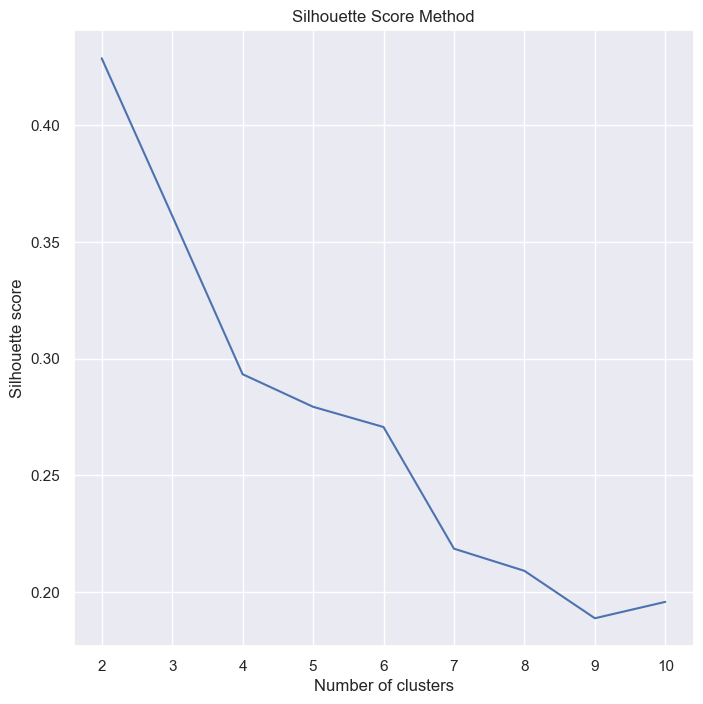

In [26]:

# set range of number of clusters to test
k_range = range(2, 11)
scores = []

# fit AgglomerativeClustering model with different number of clusters and calculate silhouette score
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k, linkage = 'ward')
    labels = model.fit_predict(PCA_df)
    score = silhouette_score(PCA_df, labels)
    scores.append(score)

#plot silhouette score
fig = plt.figure(figsize=(8,8))
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score Method')
plt.show()


According to the above figure, we can see that k = 2 gives us the best silhoutte score. However, I am going to set my k =3 because I think three groups is better especially when we want to use our results to target groups. Two grous would give overgeneralized groups.

In [27]:
#Initiating the AgglomerativeClustering model 

AC = AgglomerativeClustering(n_clusters=3, linkage = 'ward')
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

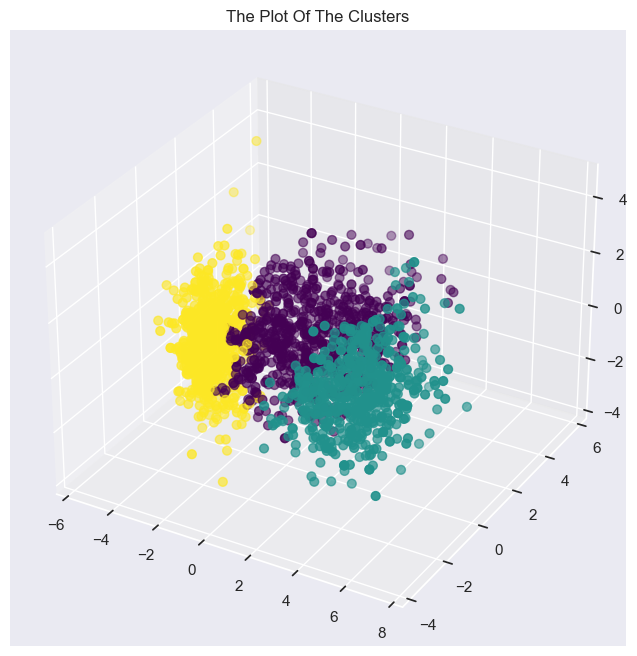

In [28]:
#Plotting the clusters after clustering
cmap = cm.get_cmap('viridis')
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

We can see that our three clusters have someoverlap among clusters. Overall, I am satisfied with the clustering despite some overlap because in real life, there will most likely  be overlap among population.

## Cluster Analysis

Now, I am analyzing the clusters with the help of data visualization. First of all, let's see how our clusters are distributed. We can see that our clusters are not equal, but they are also not drastically different in size.

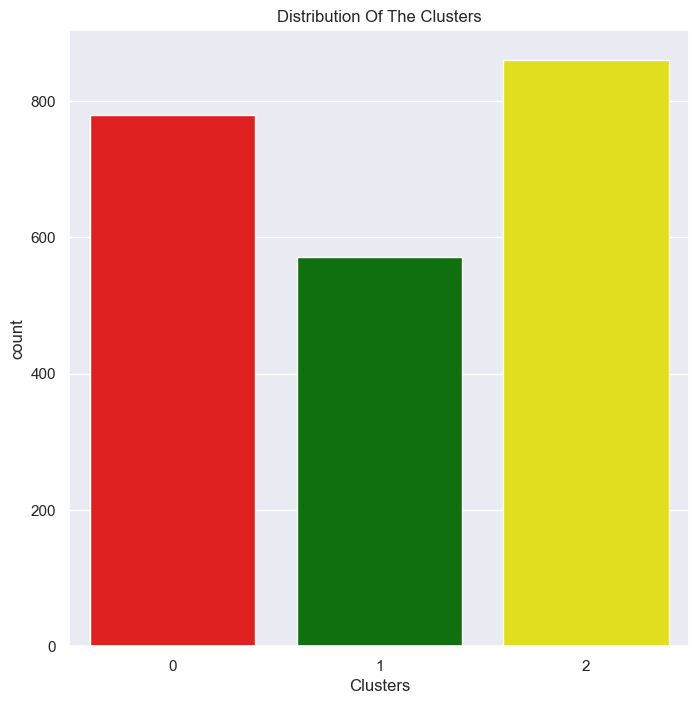

In [29]:
#Plotting countplot of clusters
fig = plt.figure(figsize=(8,8))
pal = ["Red","Green", "Yellow"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

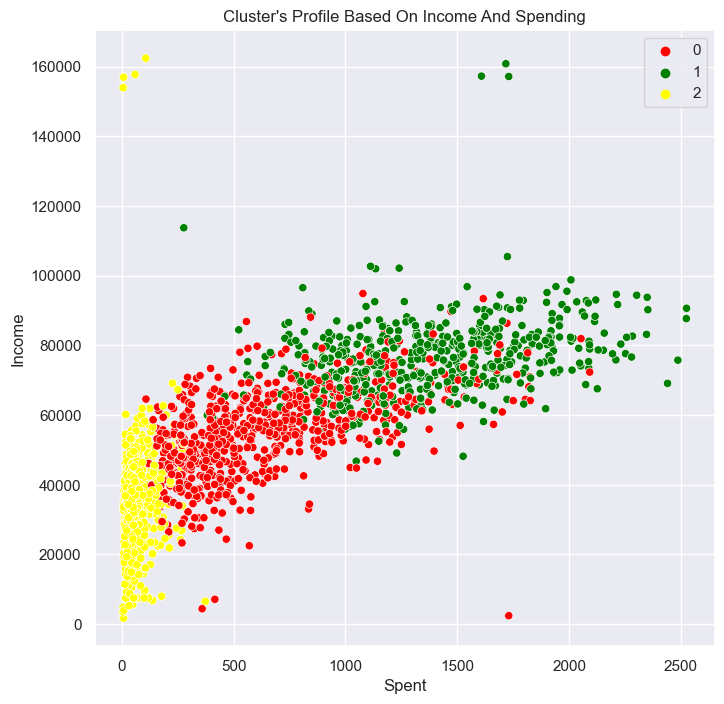

In [30]:
fig = plt.figure(figsize=(8,8))
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette = pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

We can see the income ranges for each cluster in the above figure. There is some overlap in the income but we can clealry distiguish the income ranges for each cluster.

I am trying to see how spending looks for each cluster. I am trying to get a idea of what products are popular for each cluster. The products available are wines, fruits, meat, fish, sweets, and gold.

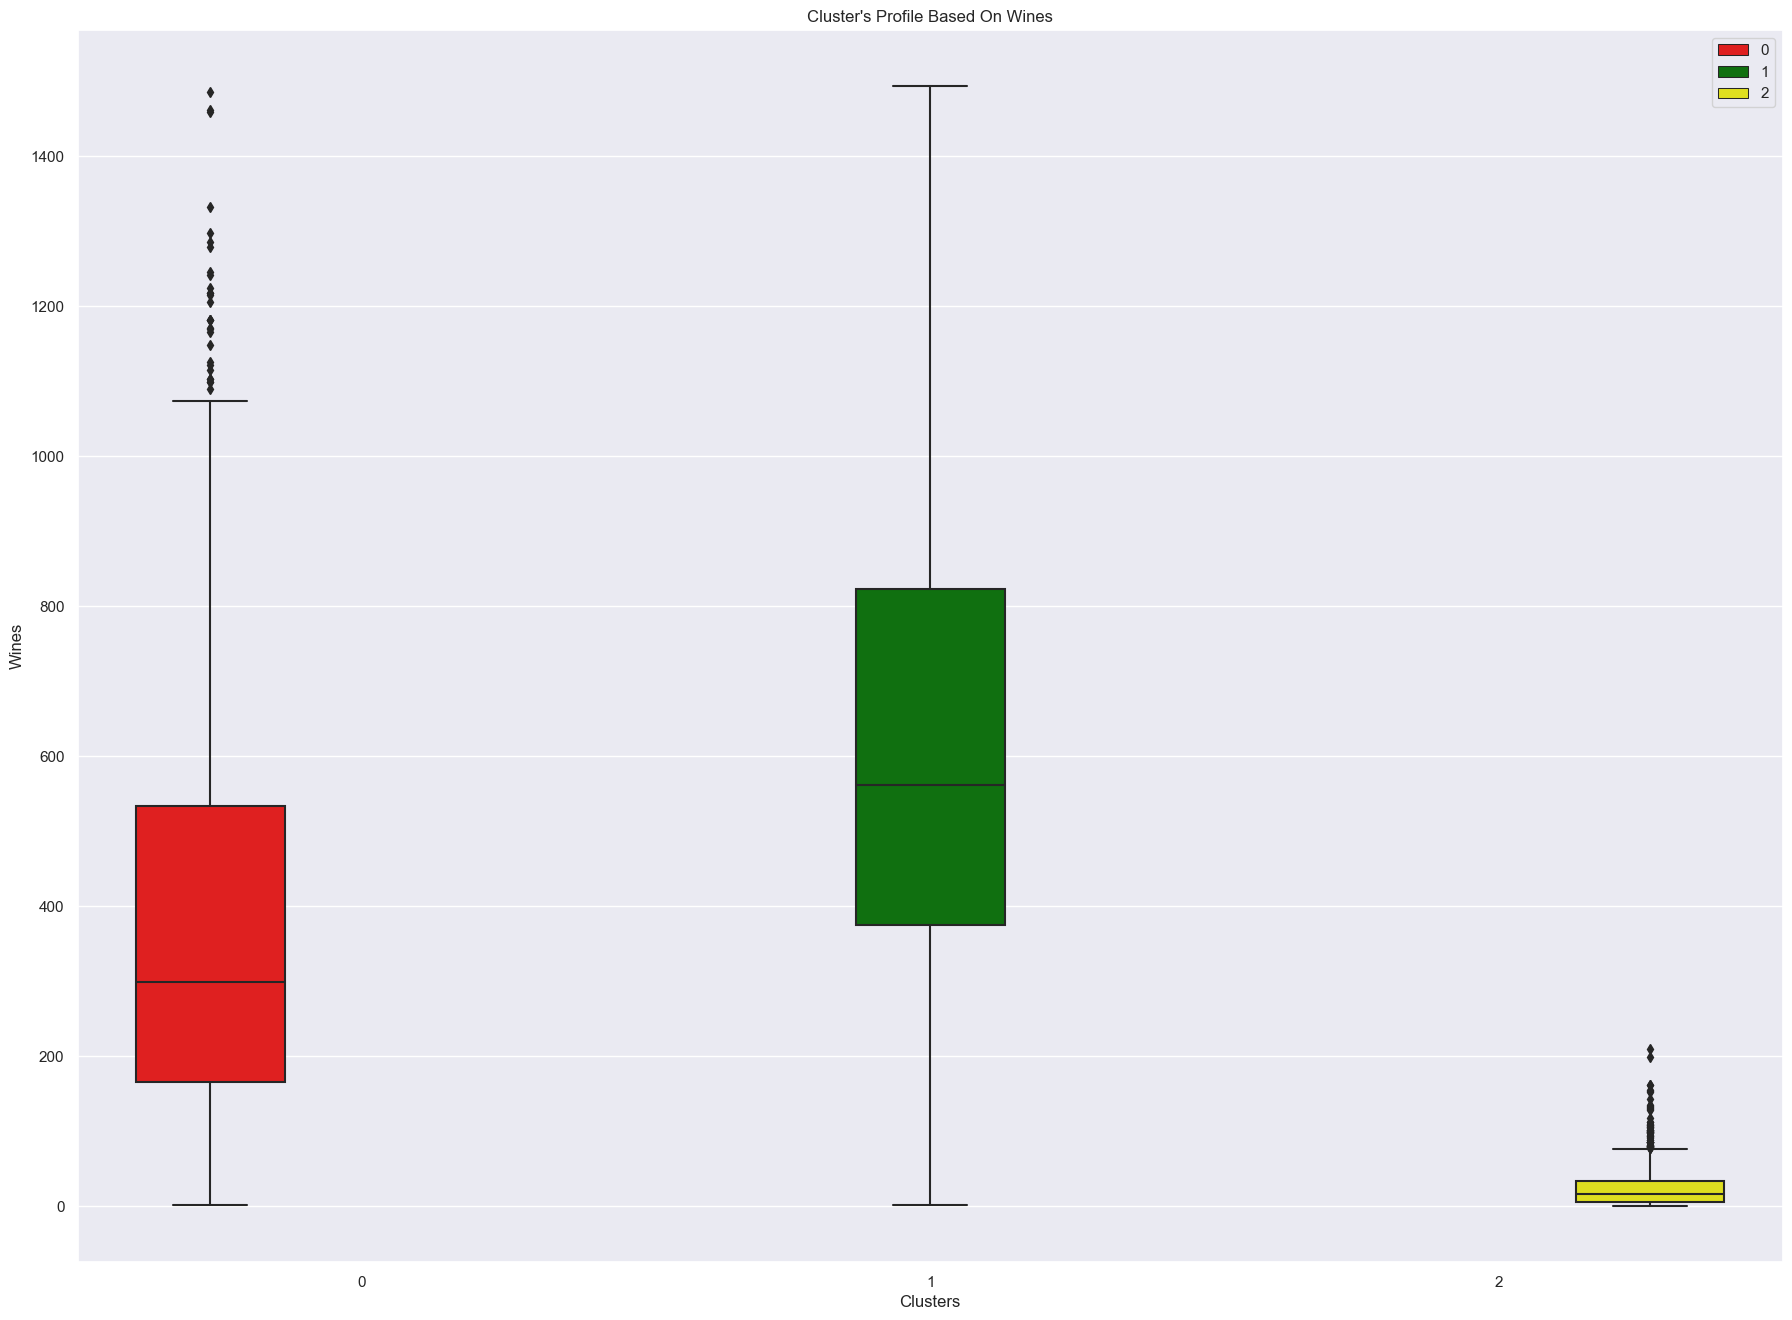

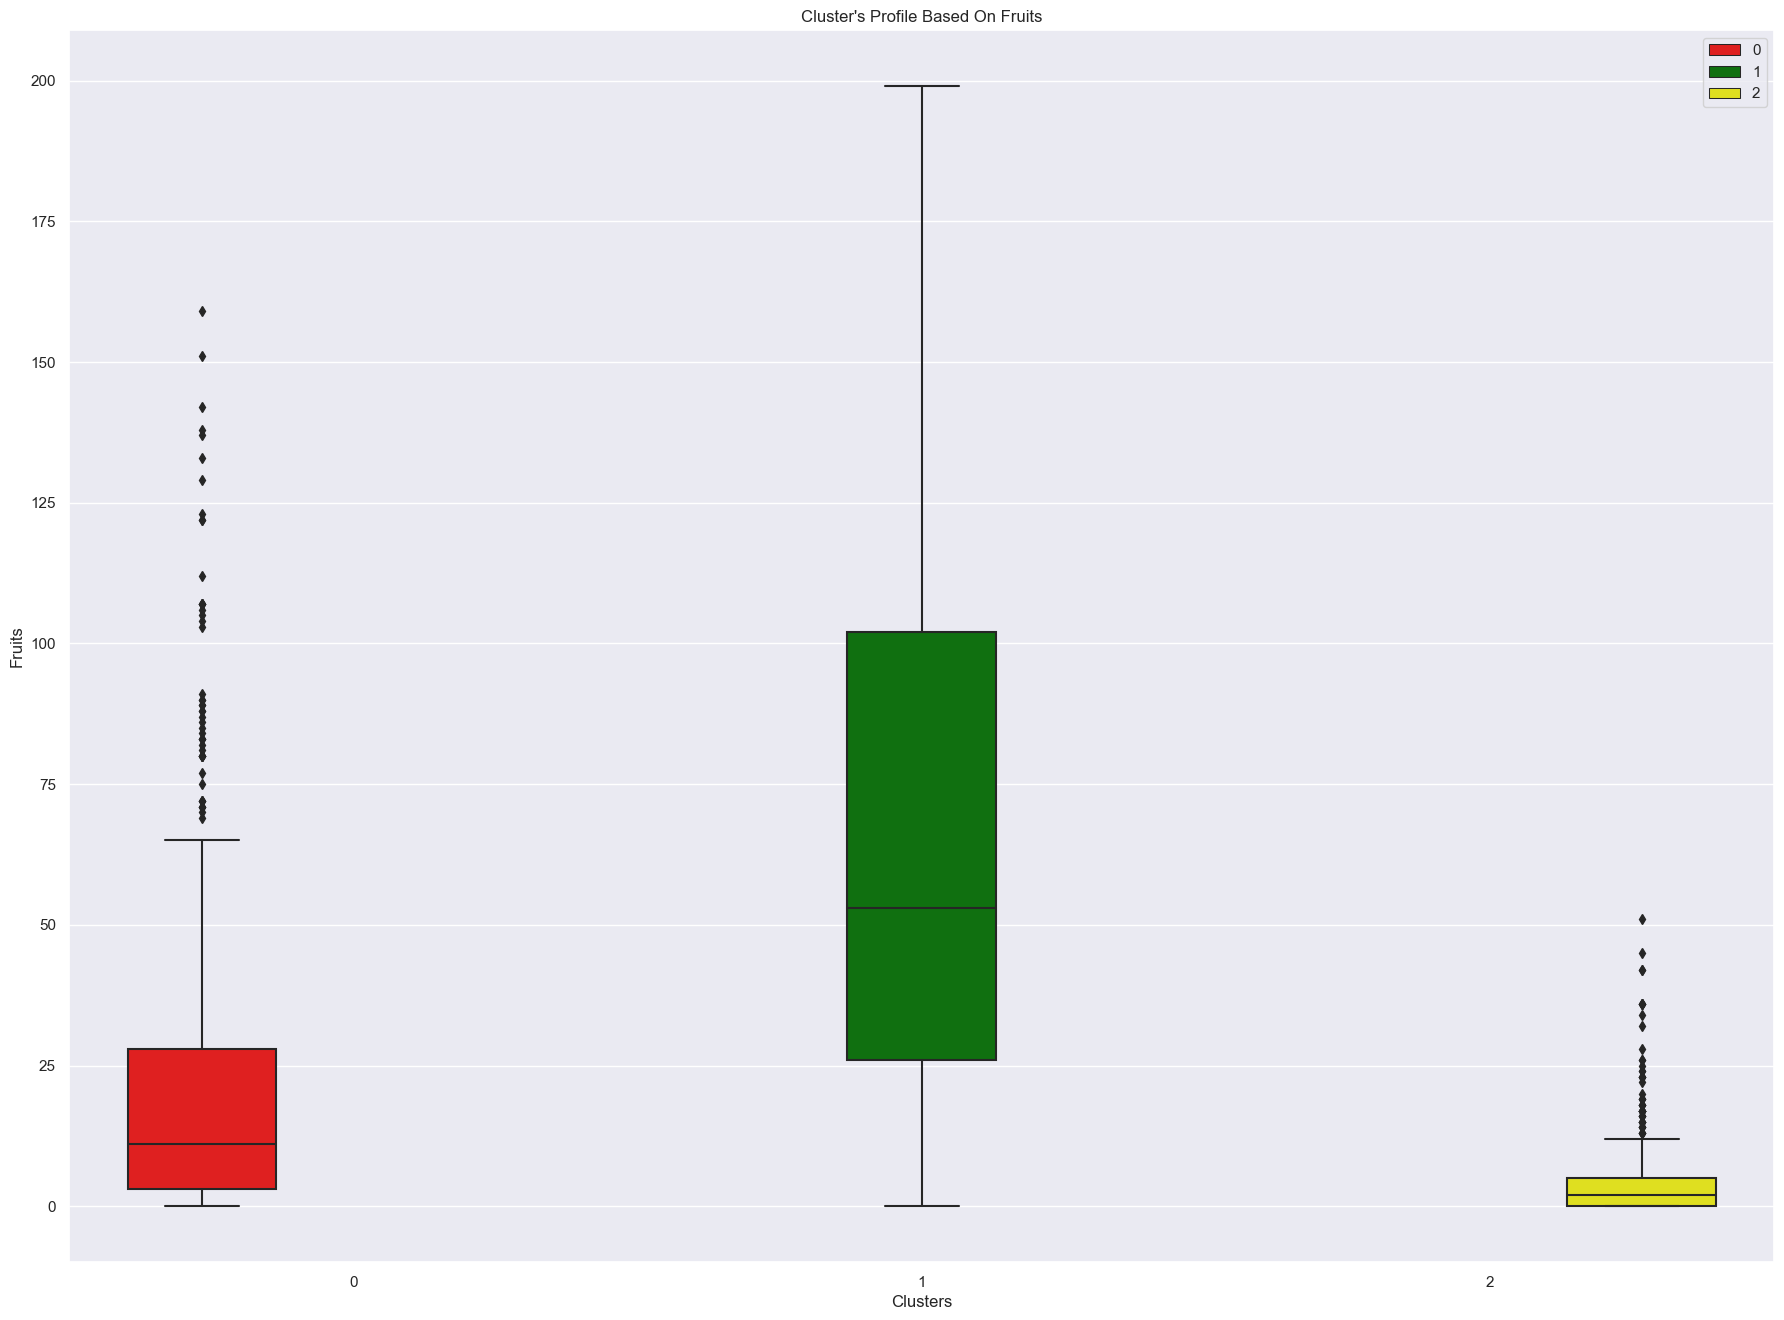

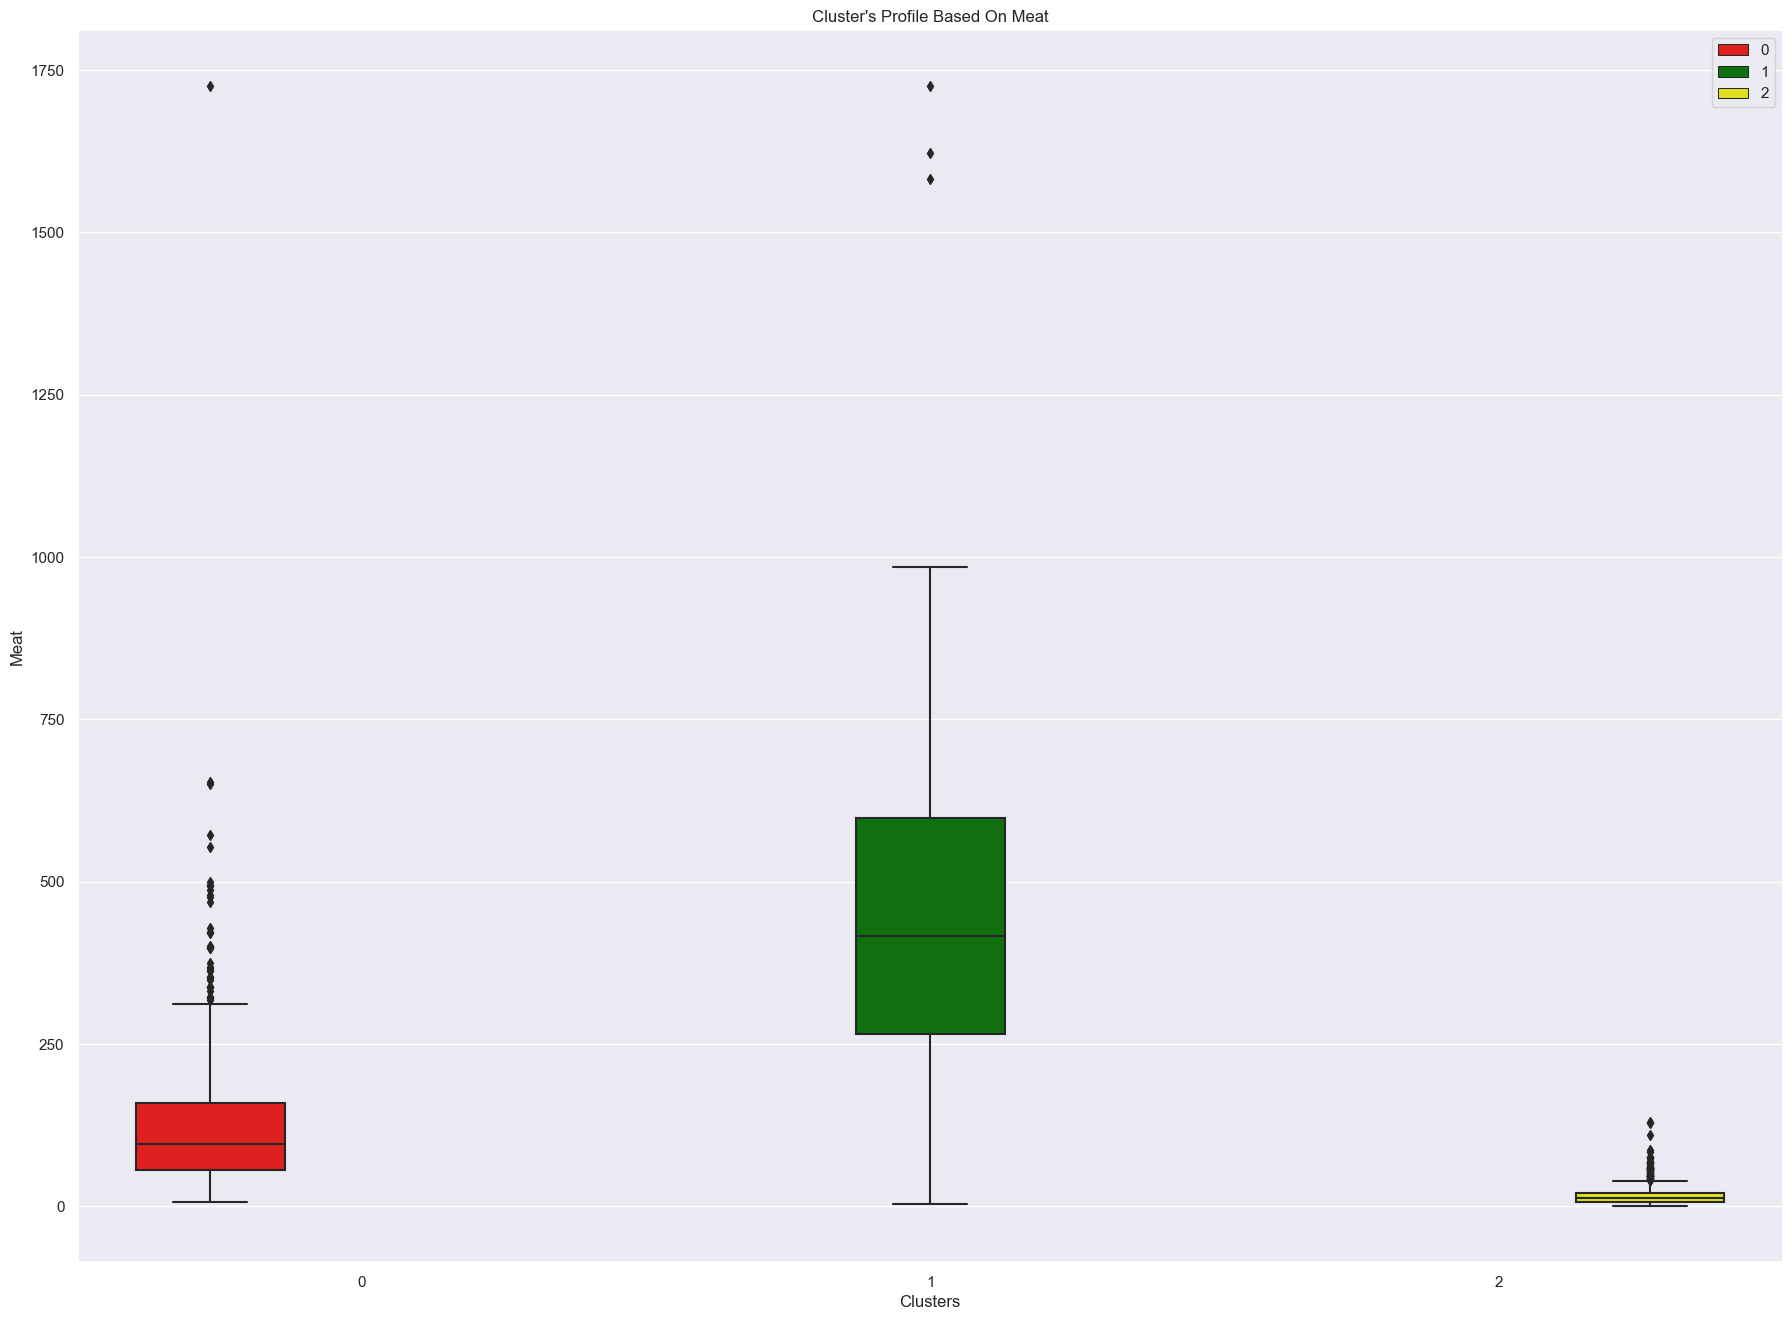

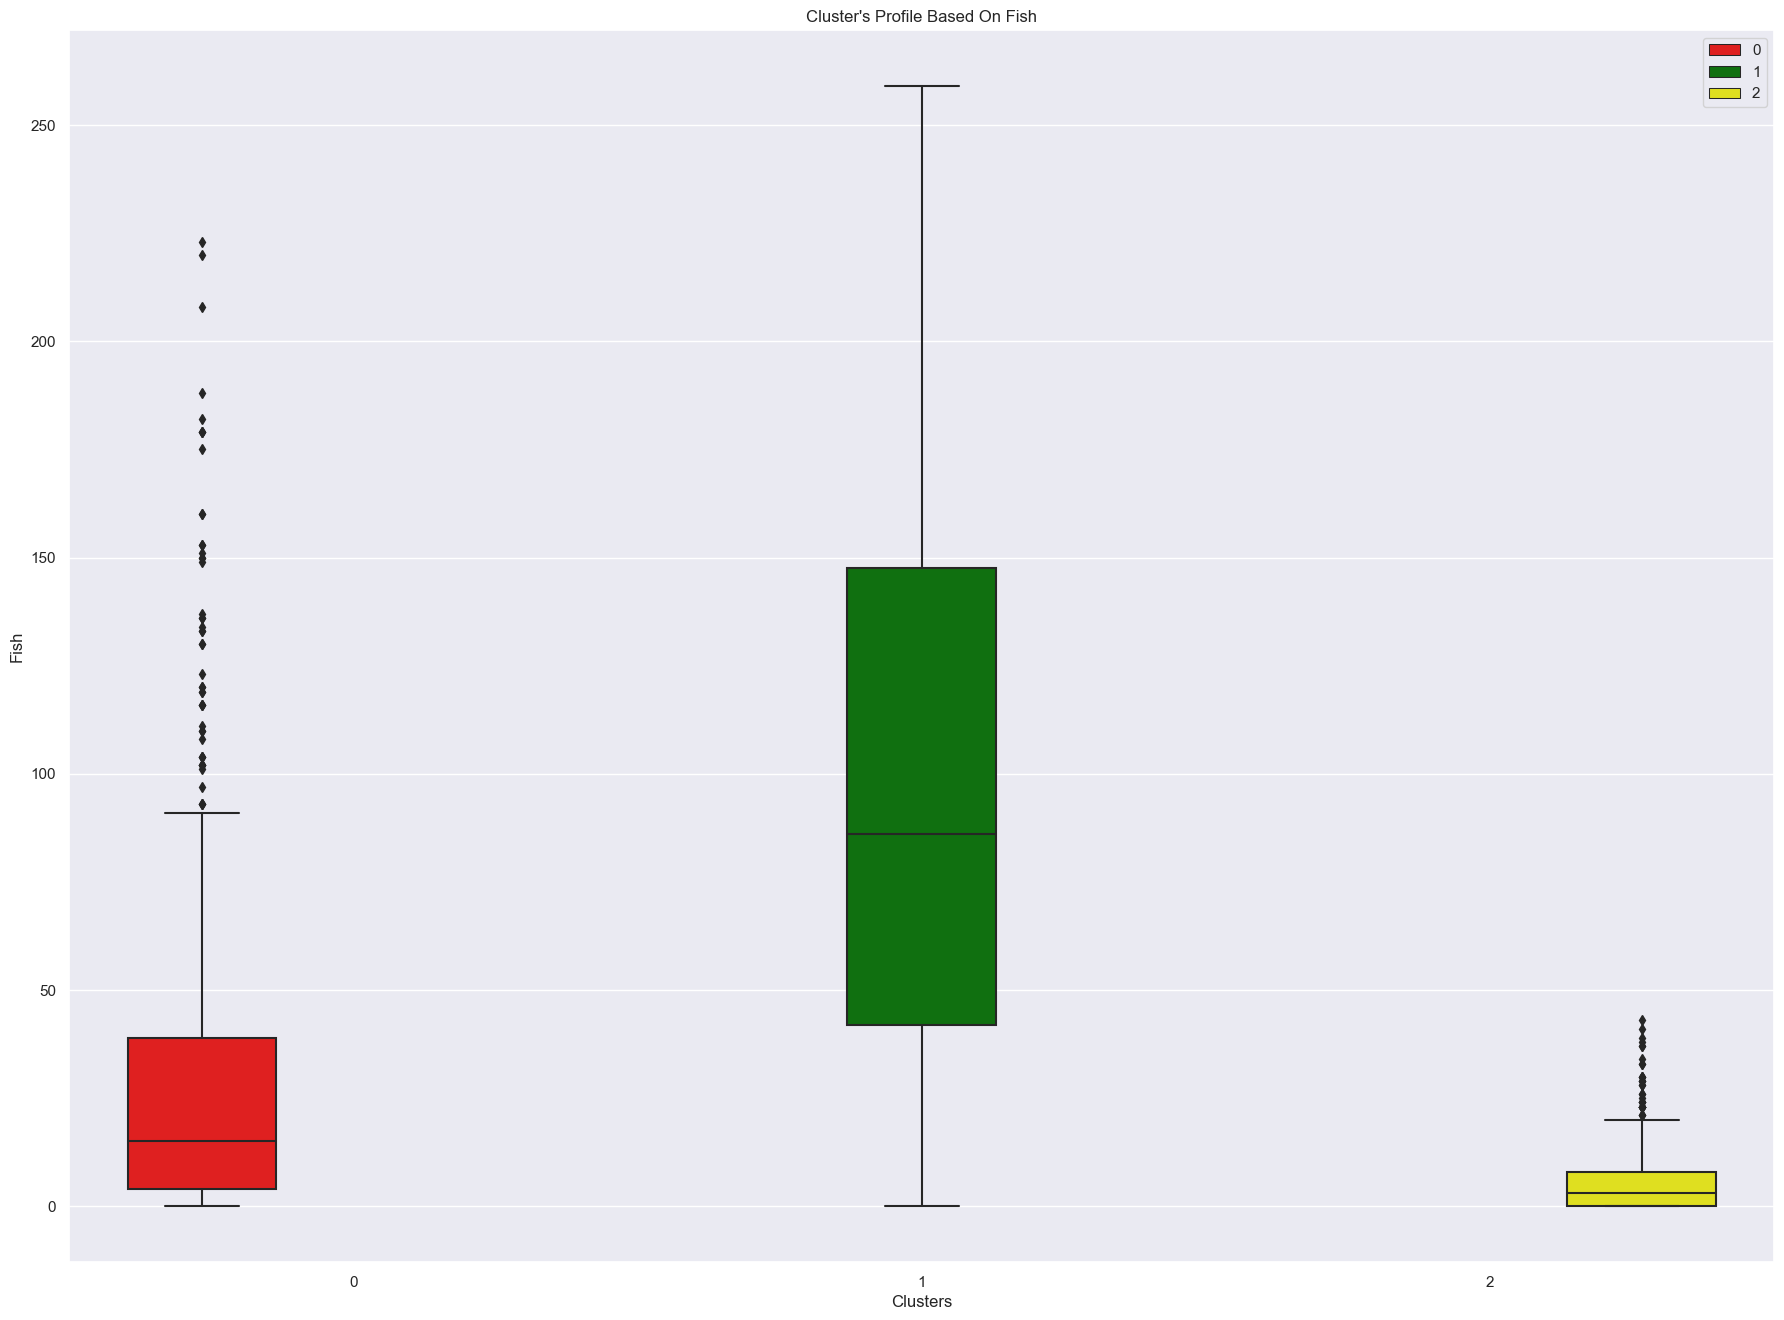

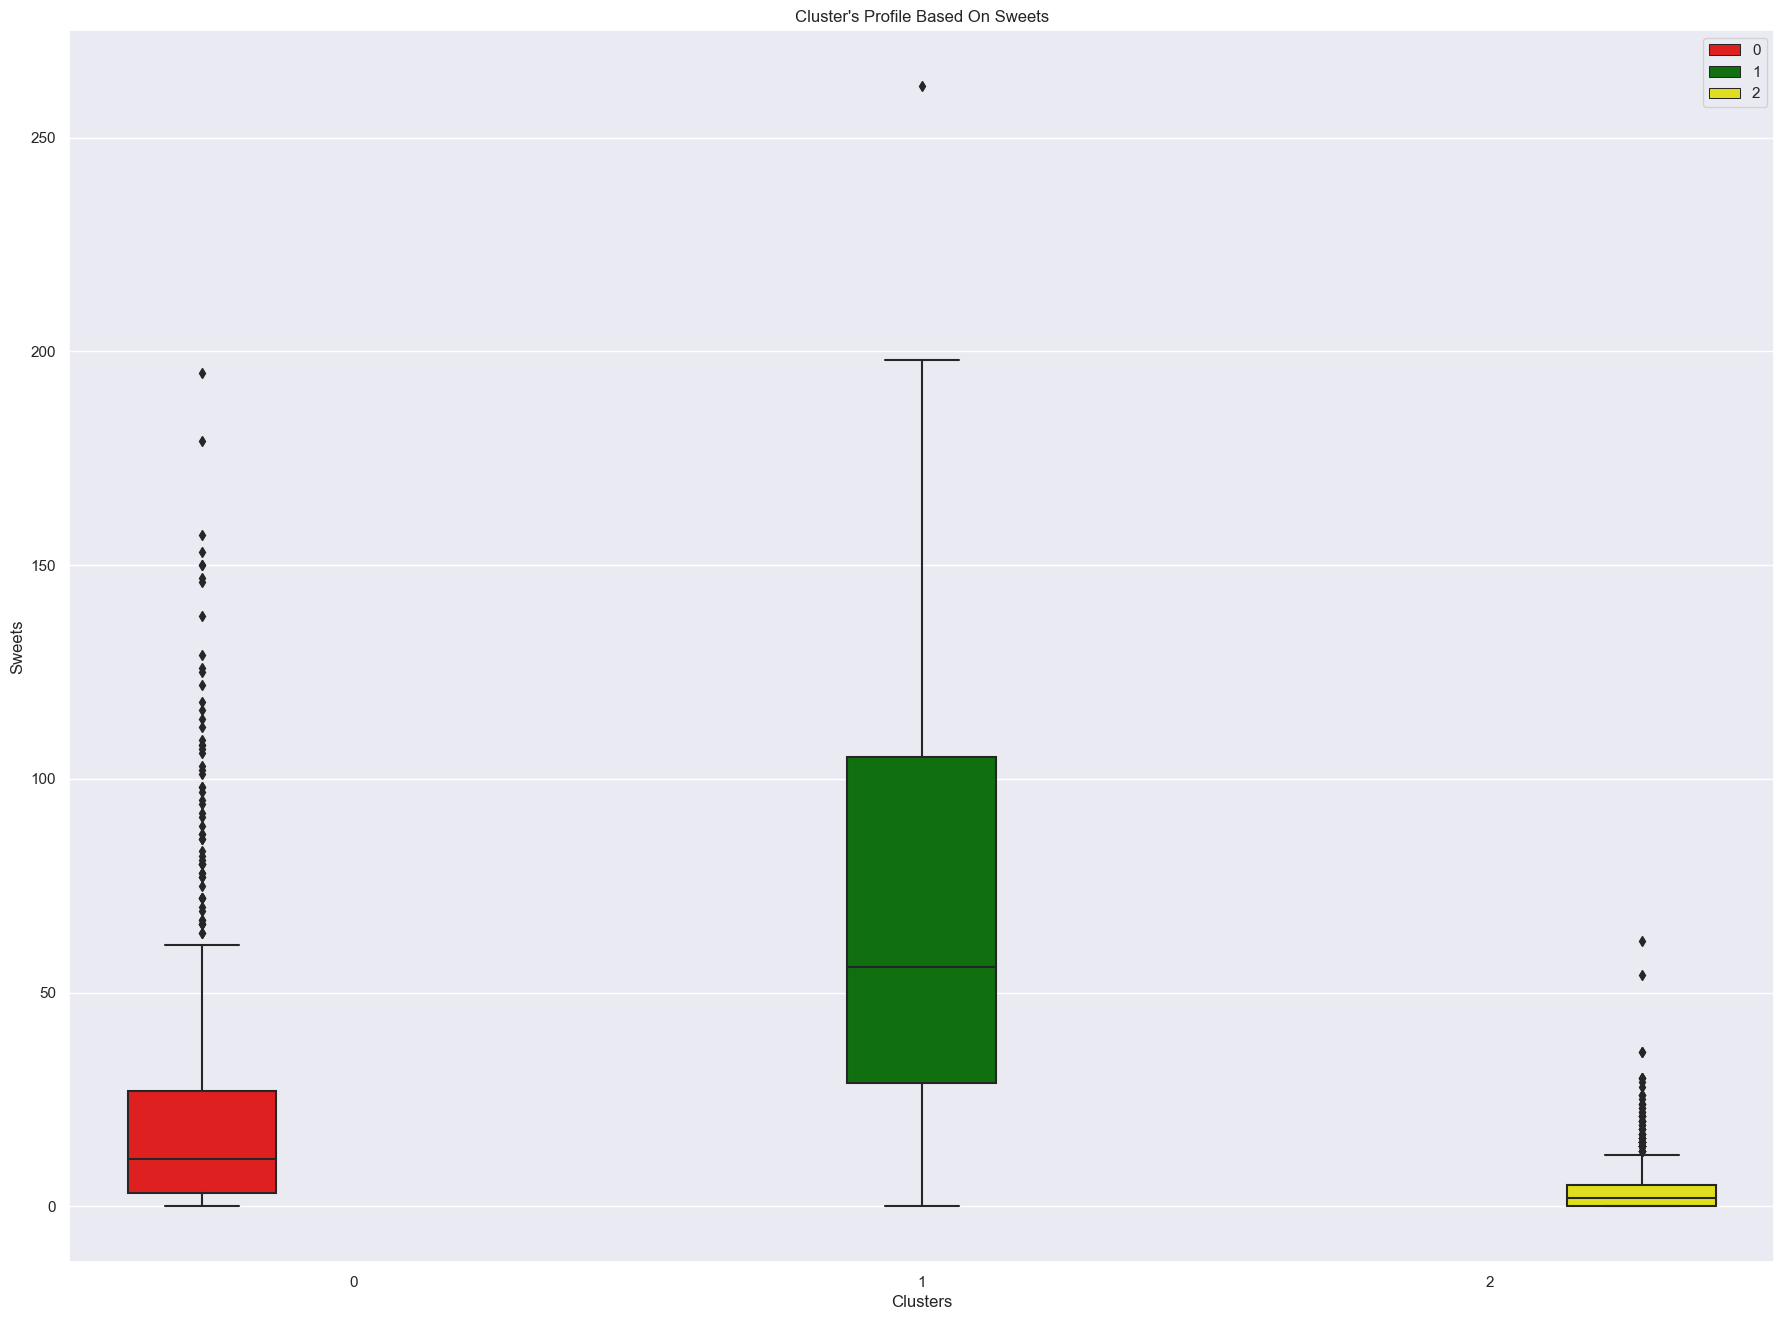

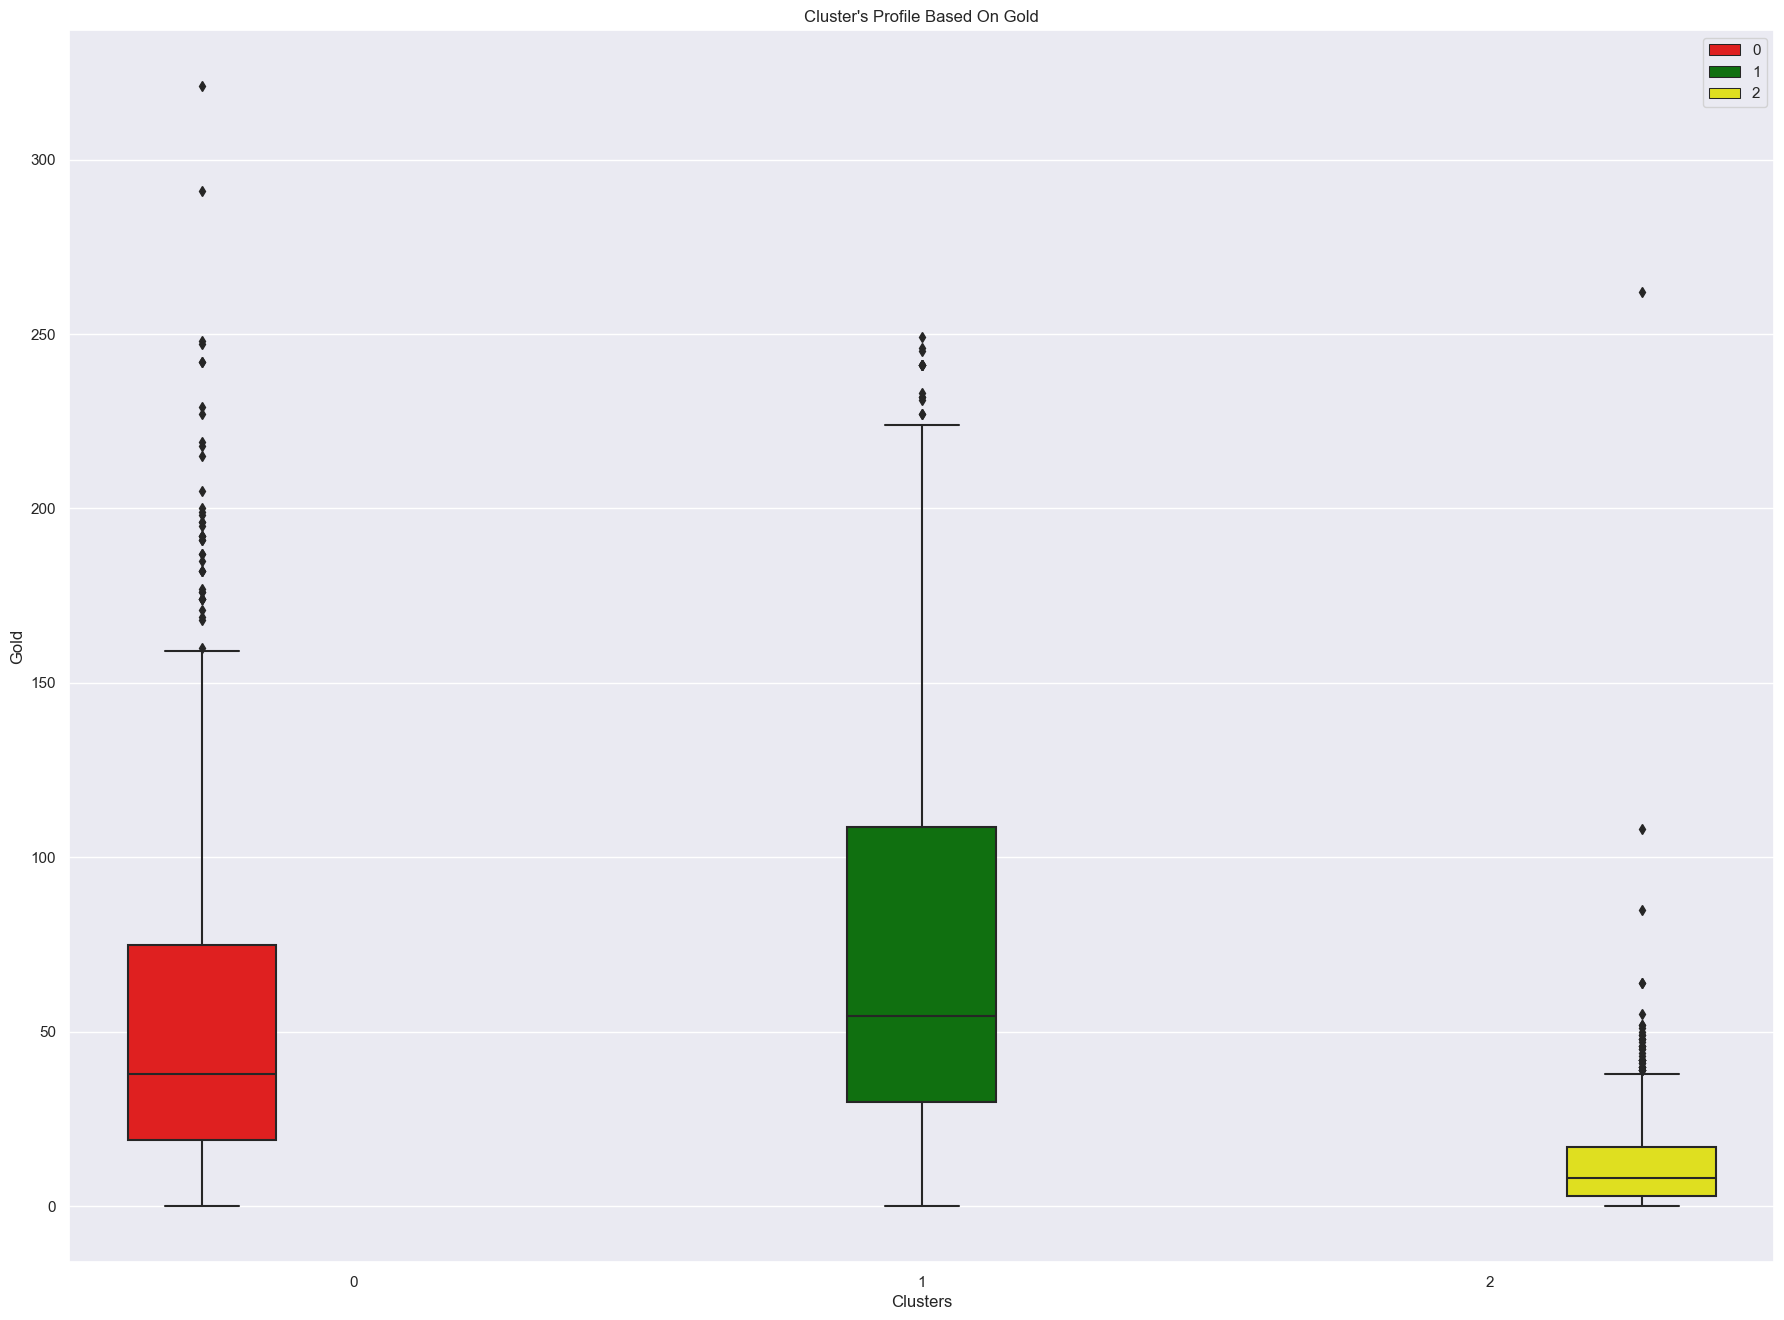

In [31]:
def boxplot(a):


    pl = sns.boxplot(data = data,x=data["Clusters"], y=data[a],hue=data["Clusters"], palette= pal)
    pl.set_title("Cluster's Profile Based On " + a)
    plt.legend()
    plt.show()
    
cols = ['Wines', 'Fruits','Meat', 'Fish', 'Sweets', 'Gold']

for i in cols:
    boxplot(i)

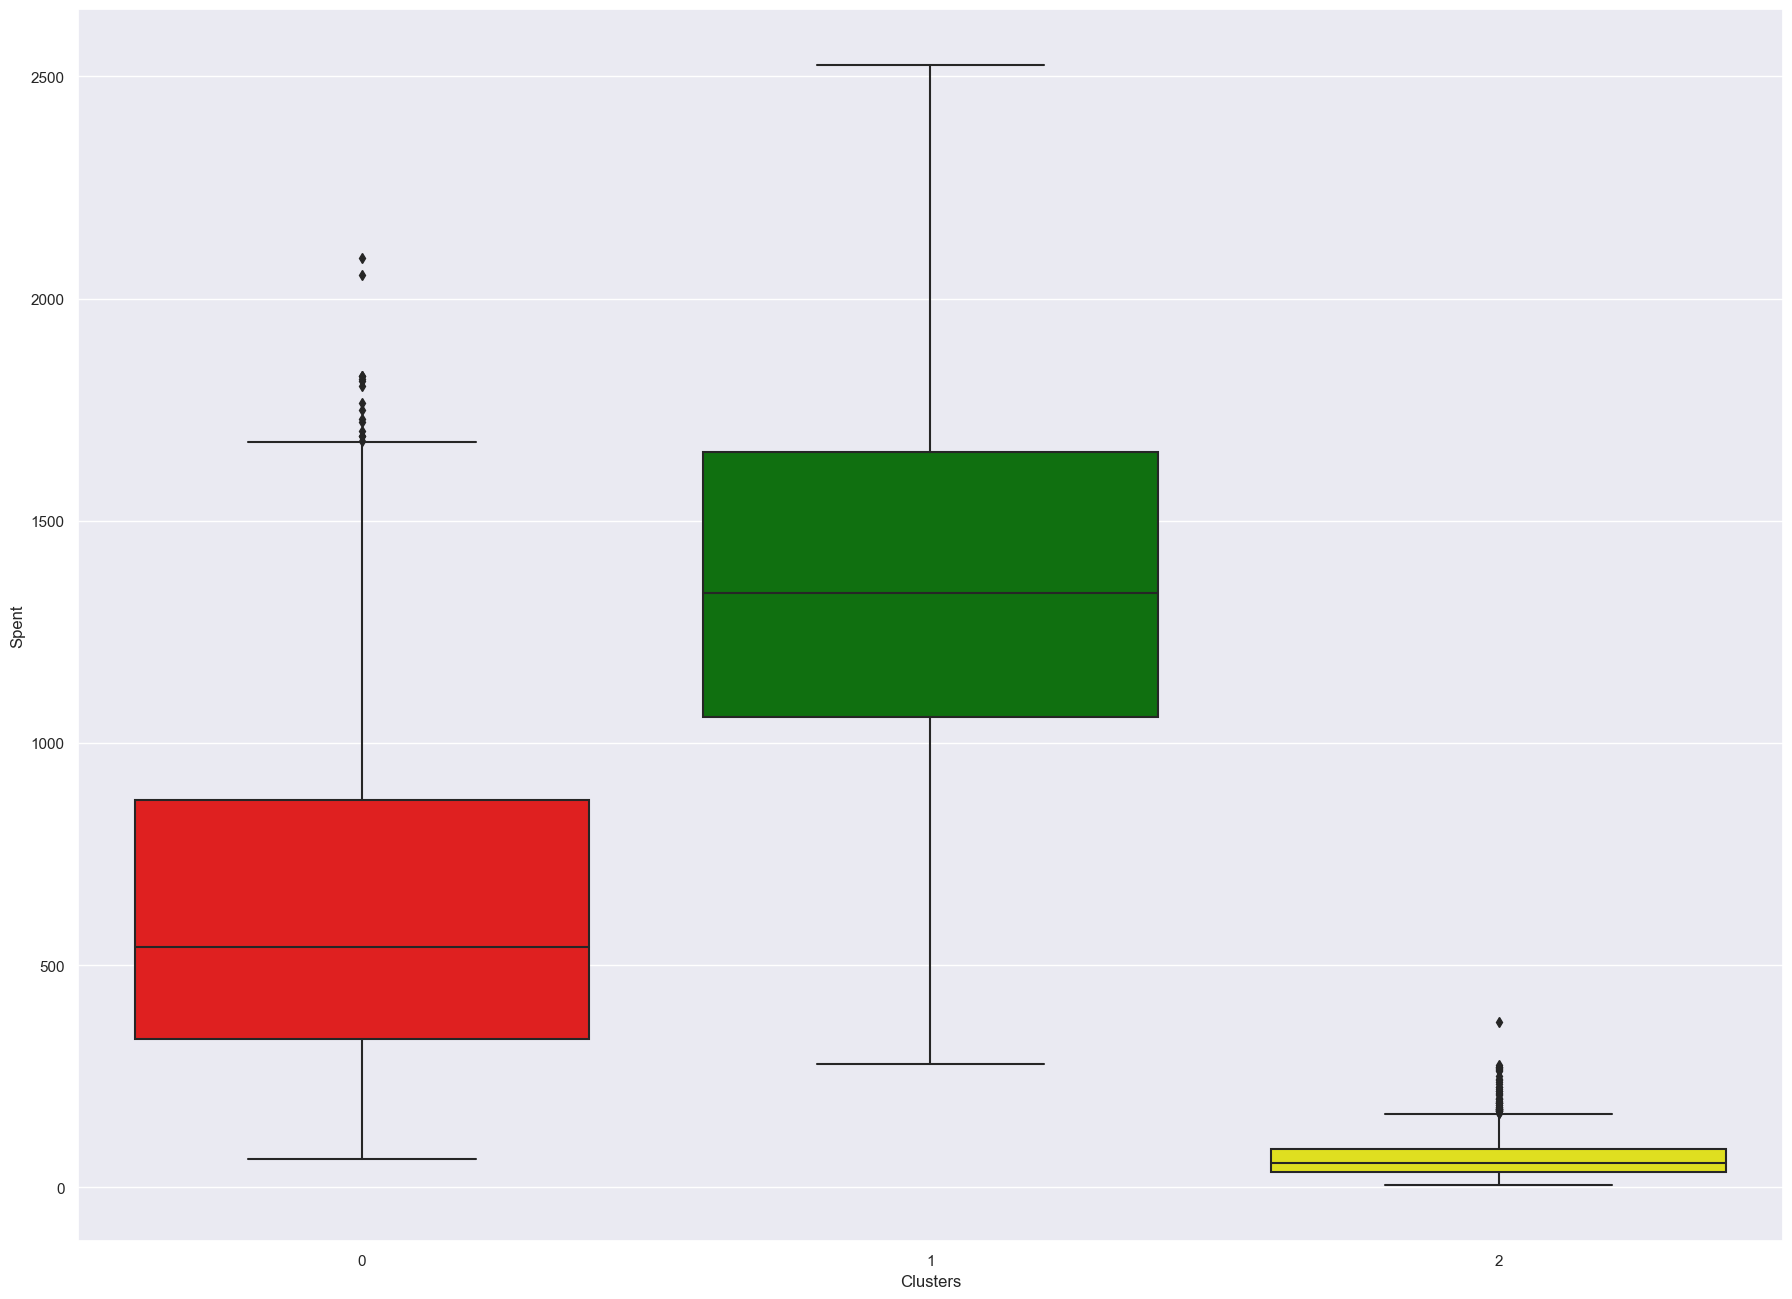

In [32]:
plt.figure()
pl=sns.boxplot(x=data["Clusters"], y=data["Spent"], palette= pal)
#pl=sns.boxplot(x=data["Clusters"], y=data["Spent"])
plt.show()

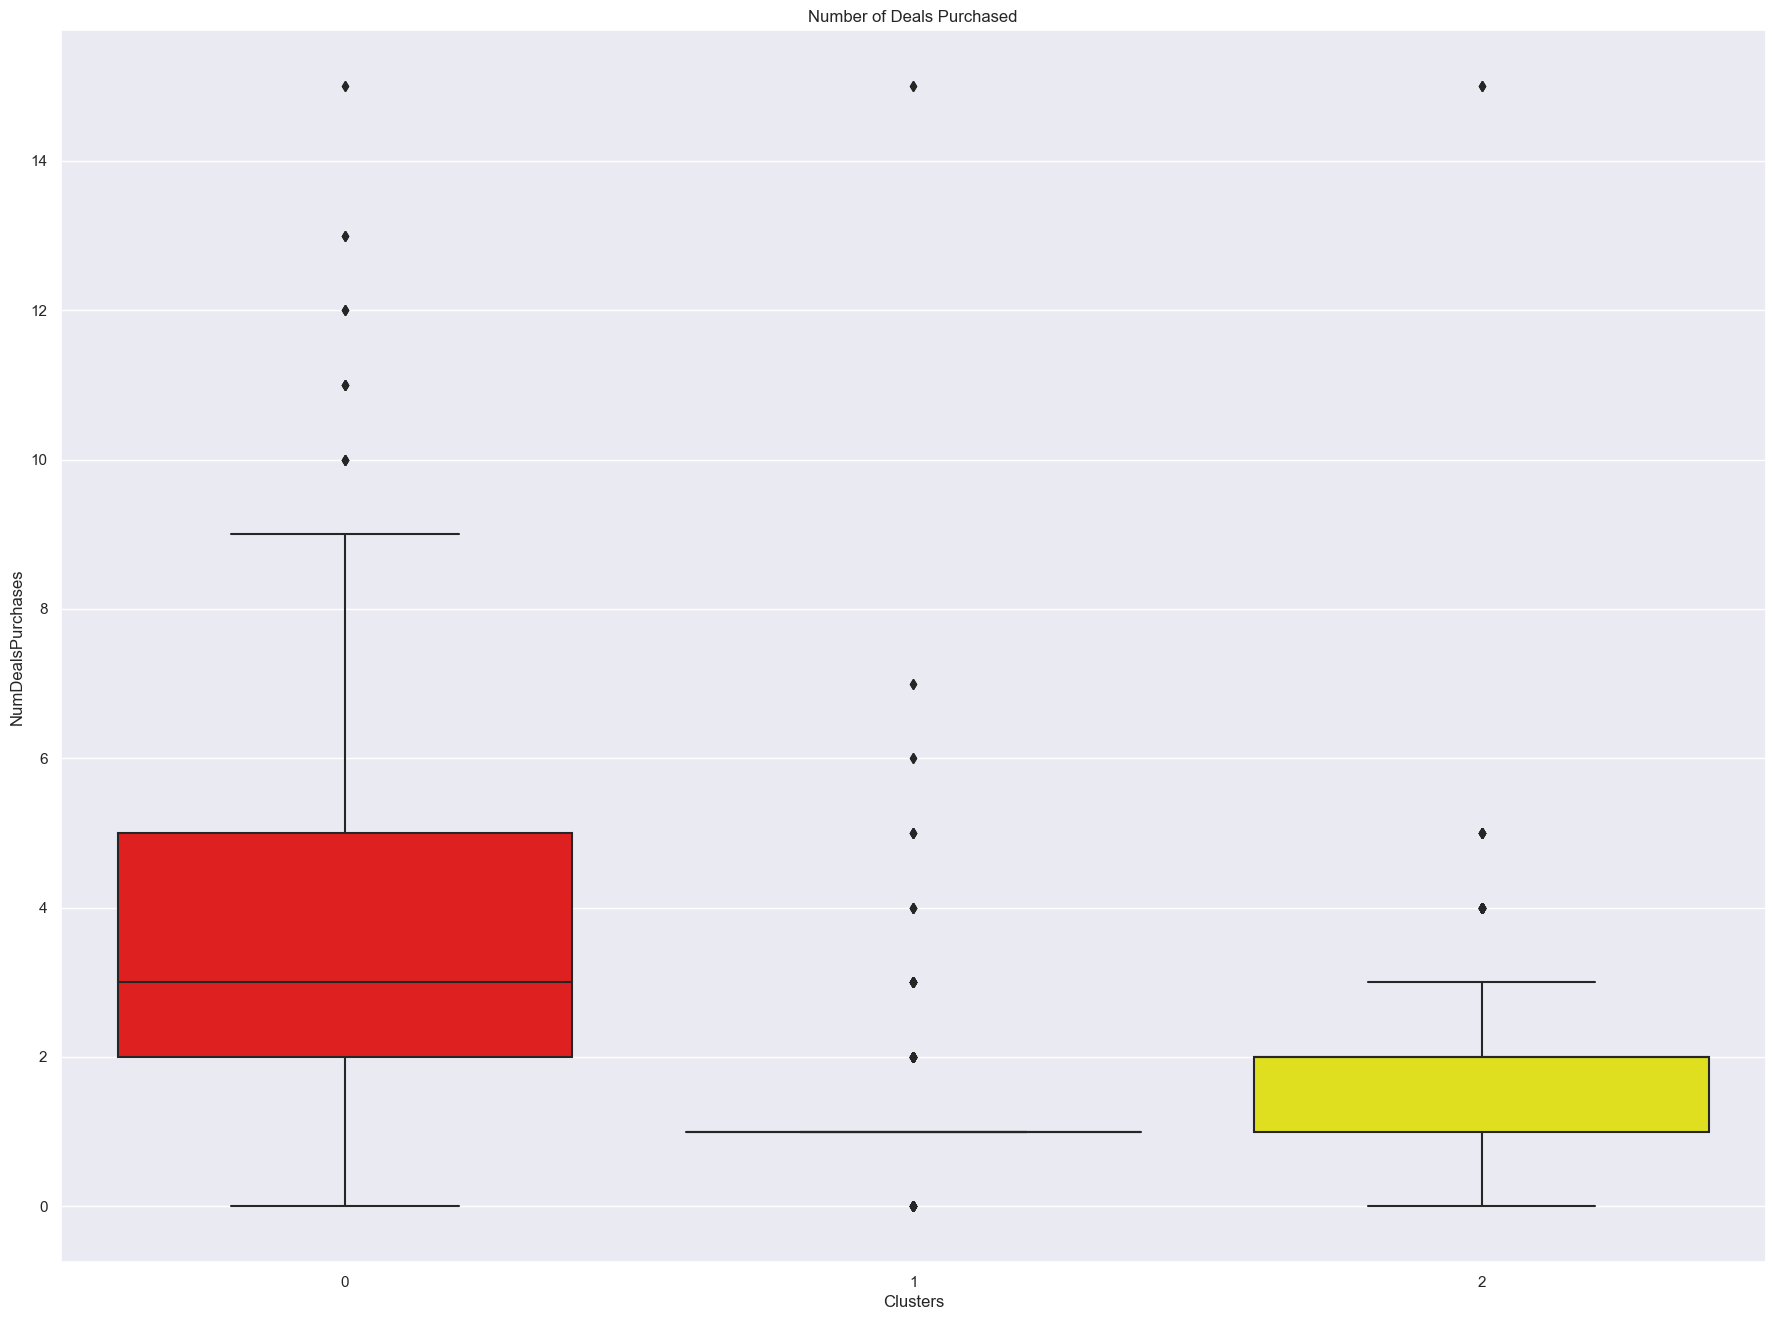

In [33]:
#Plotting the number of deals purchased by each cluster
plt.figure()
pl=sns.boxplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

I was curious if each cluster had different response to  deals and promotions. So I decided to add a feature by adding the data for all accepted promotions to see how those might affect each clusters.

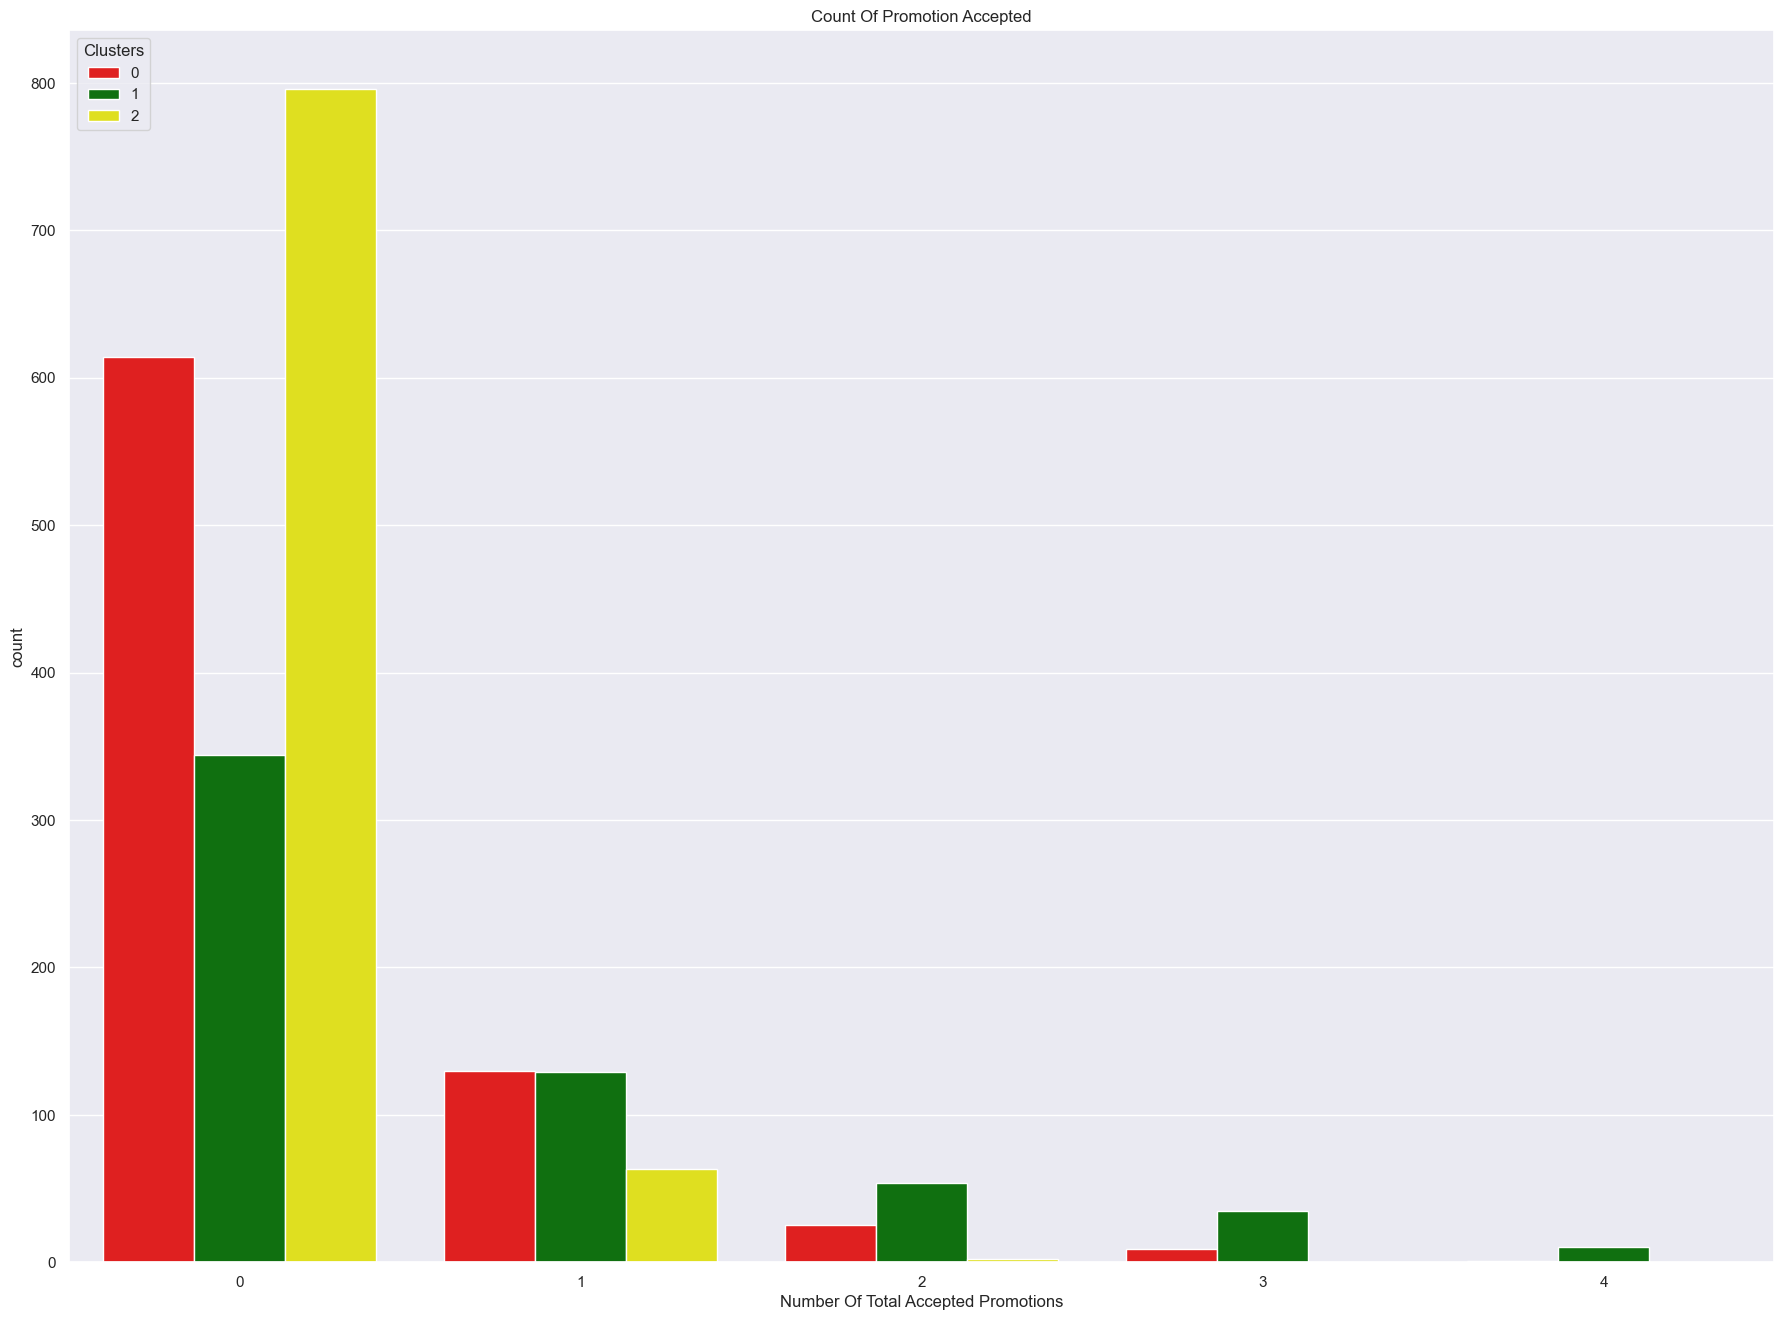

In [34]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

Plotting histogram to see the education, marital status and children distribution for each cluster.

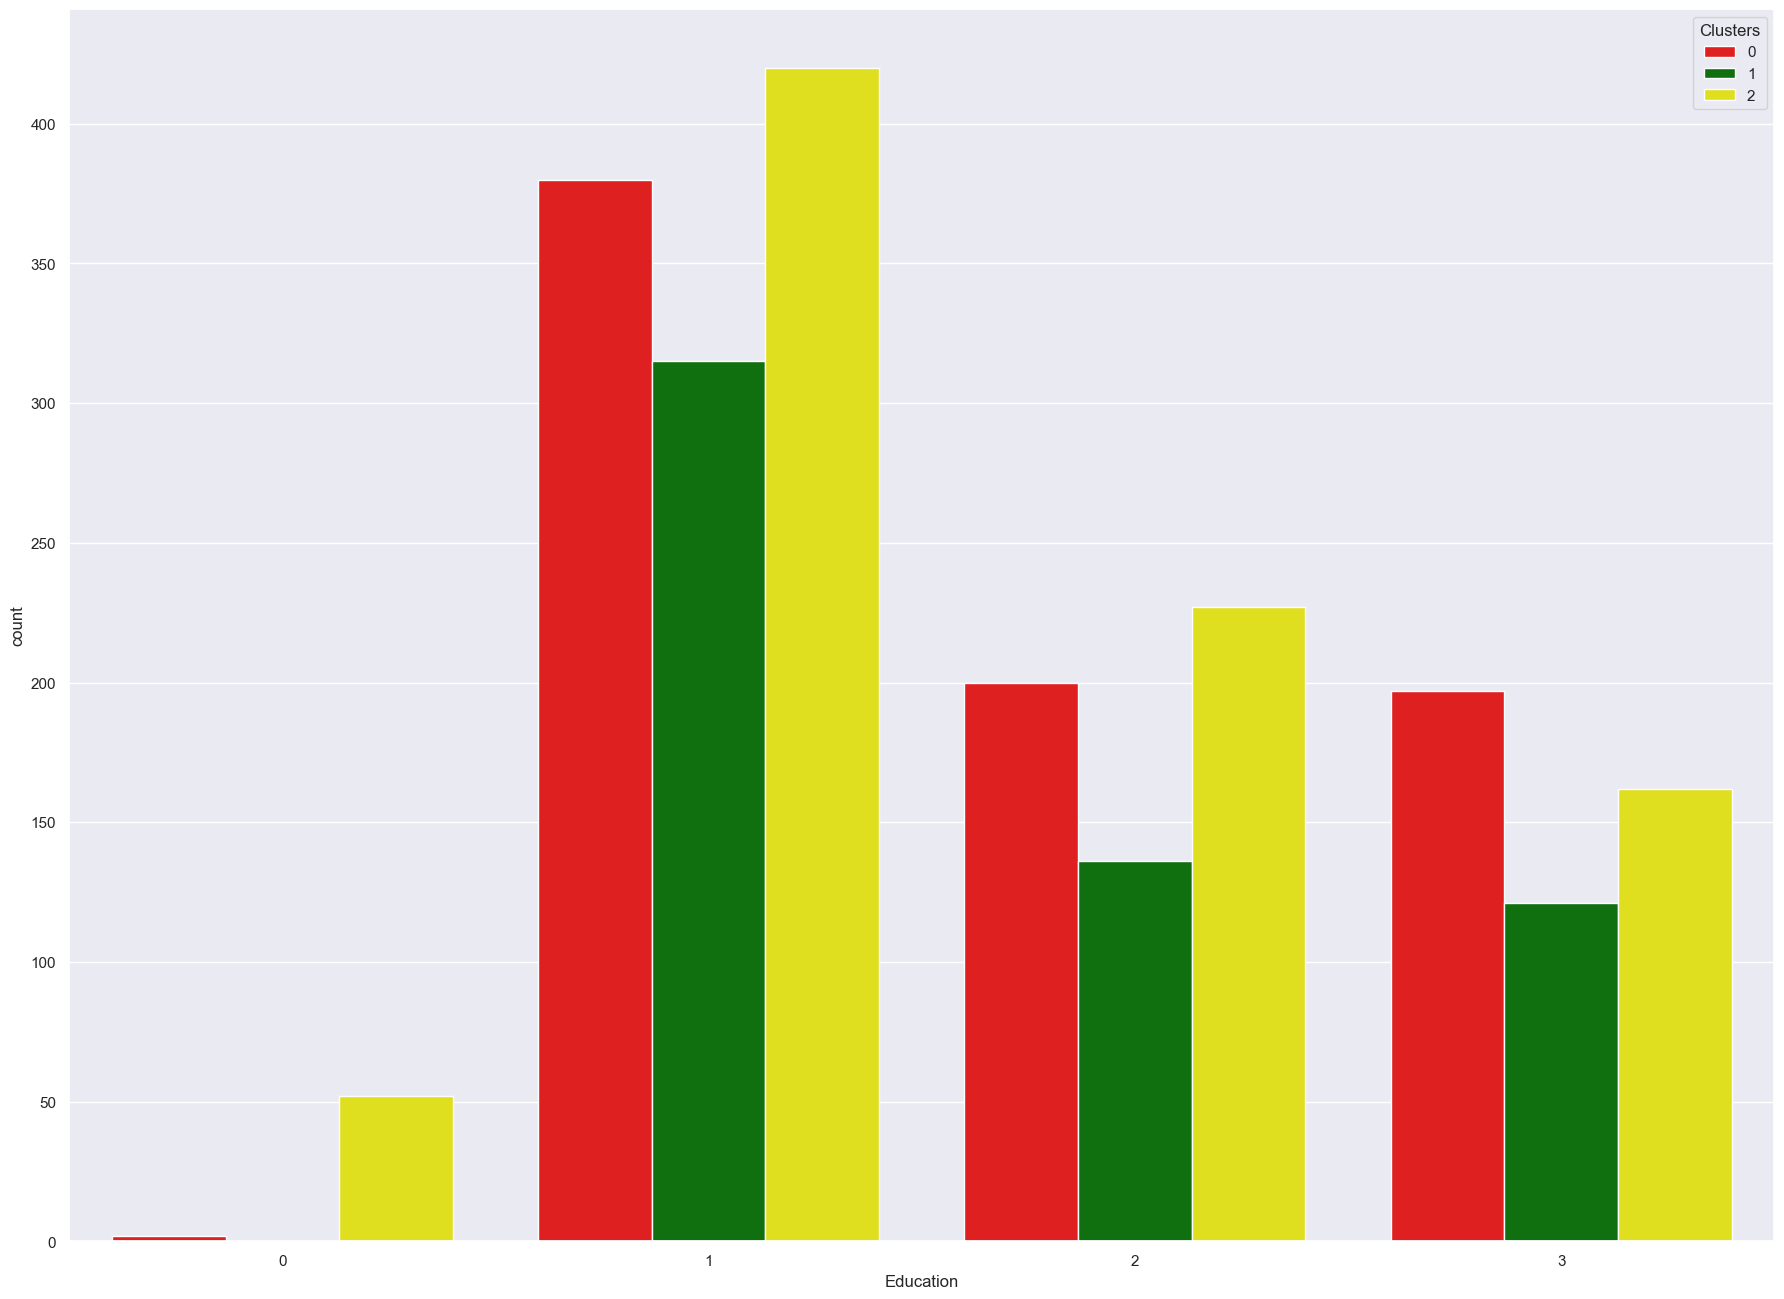

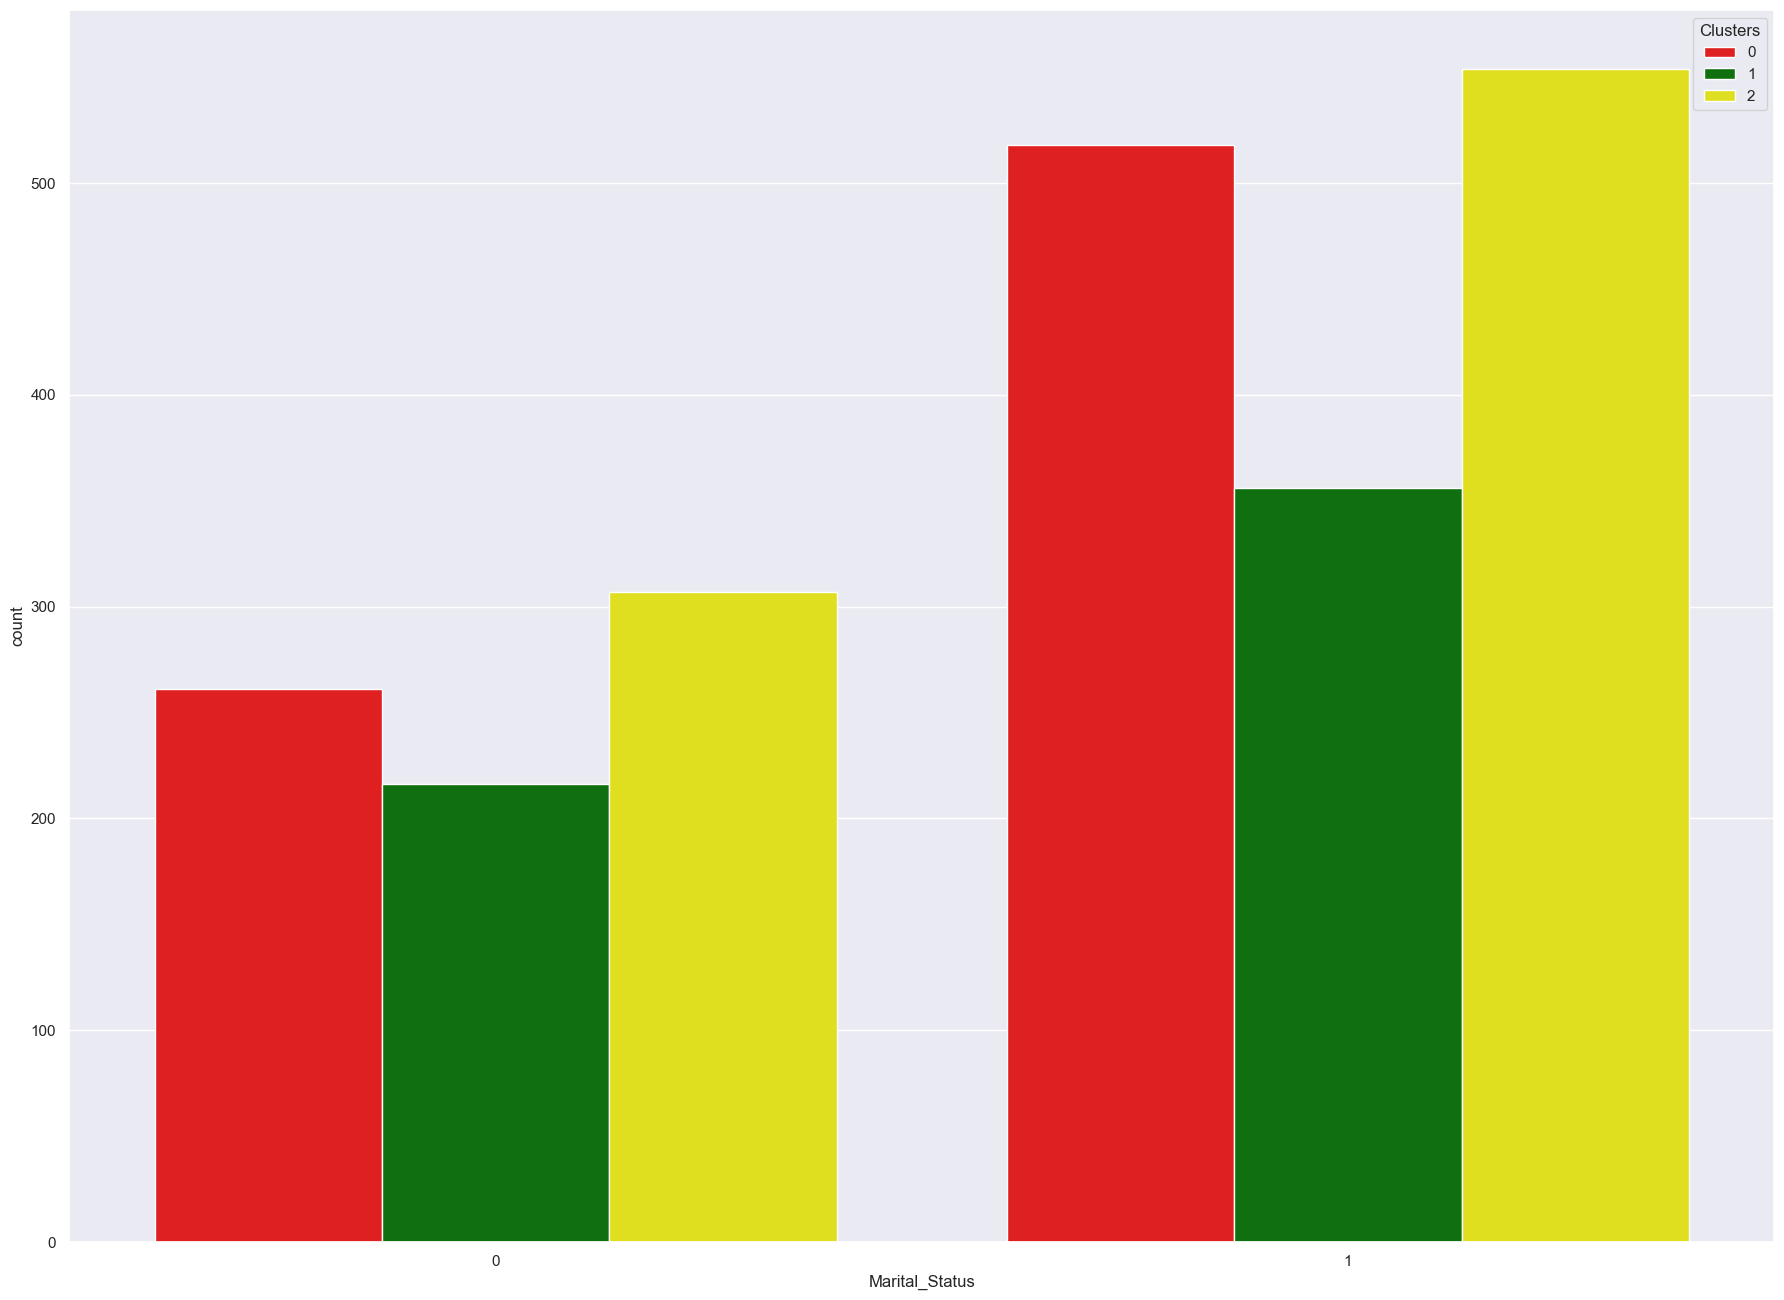

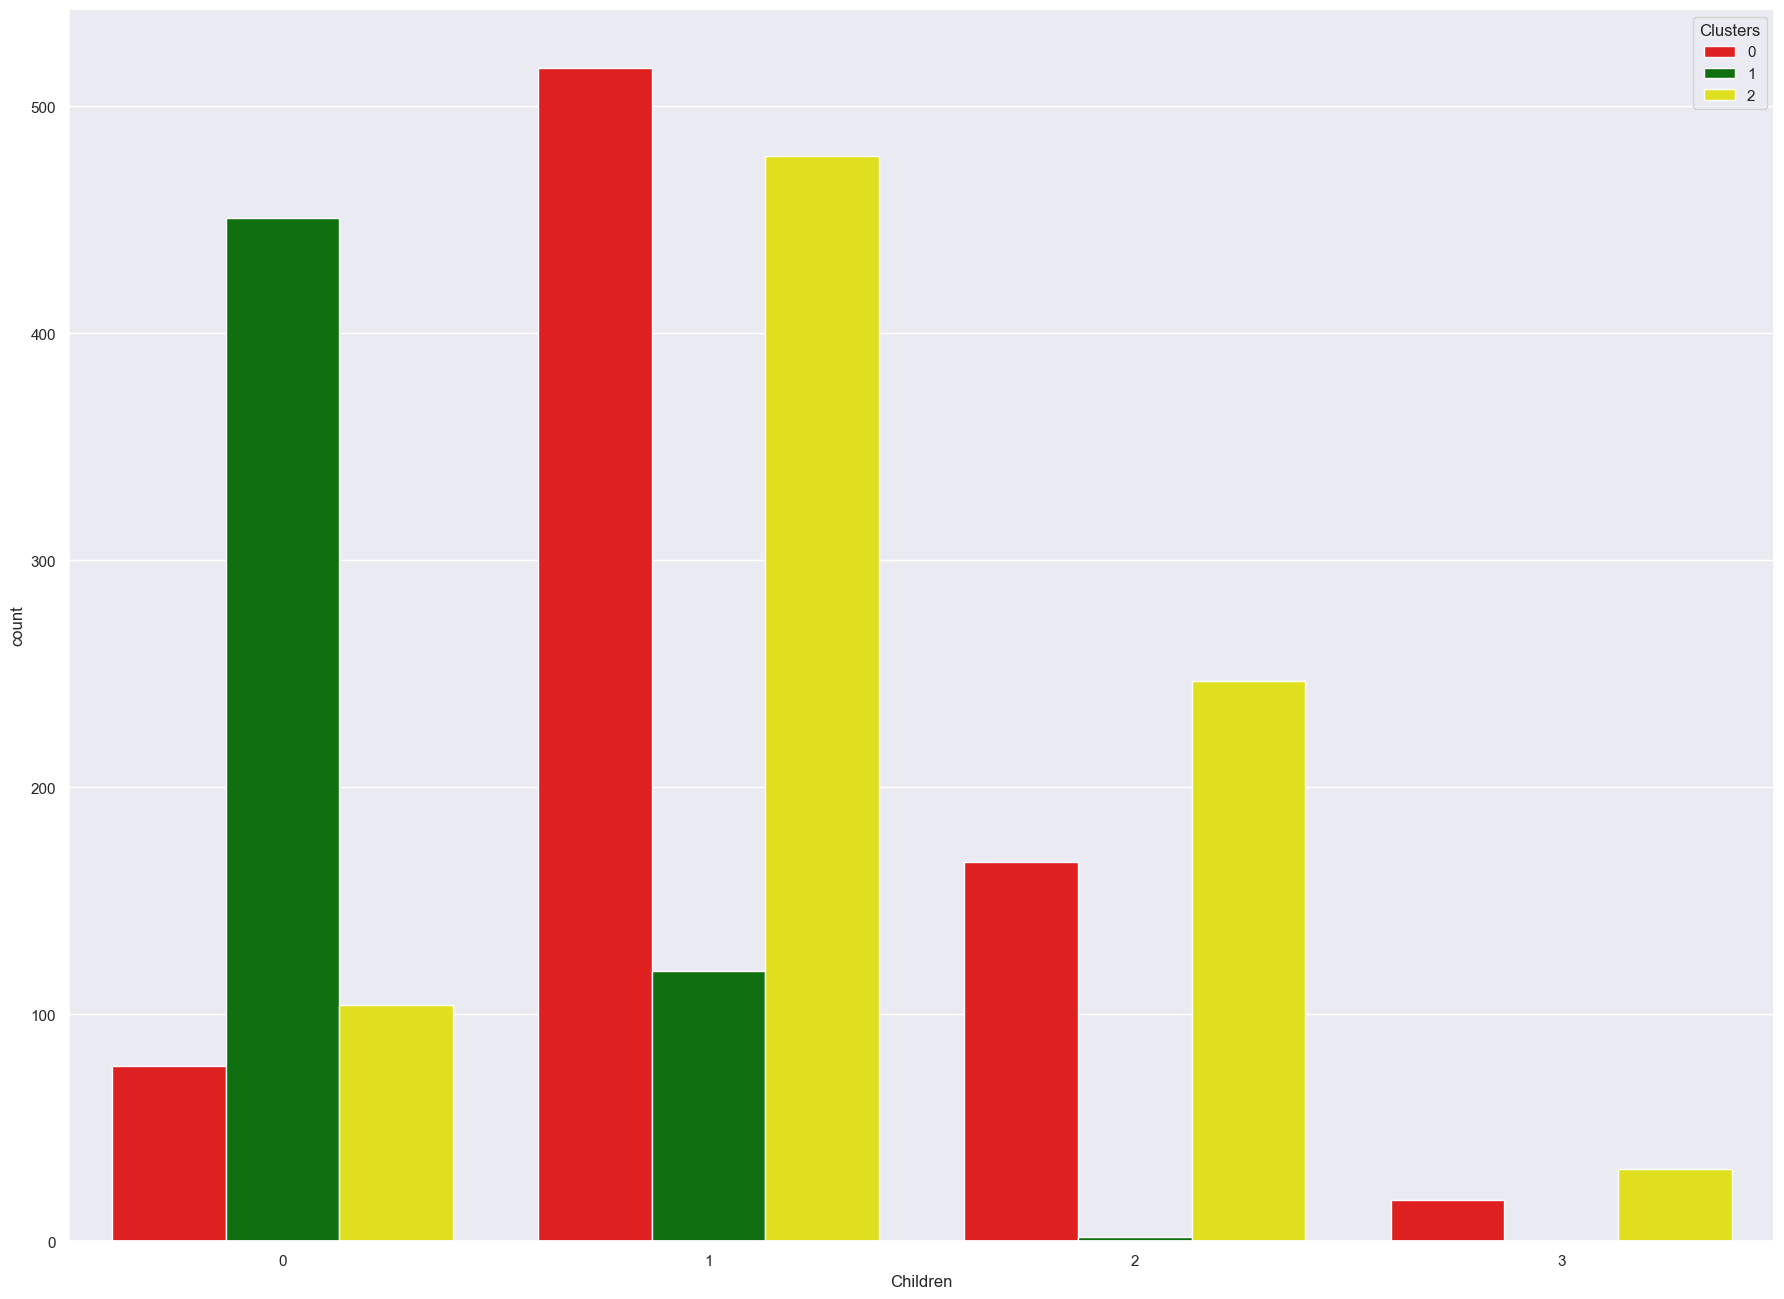

In [35]:
labels = ['Education','Marital_Status','Children']
for label in labels:
    plt.figure()
    sns.countplot(x=label, hue='Clusters', data=data, palette=pal)
    pl.set_title("Analysis")
    
    plt.show()

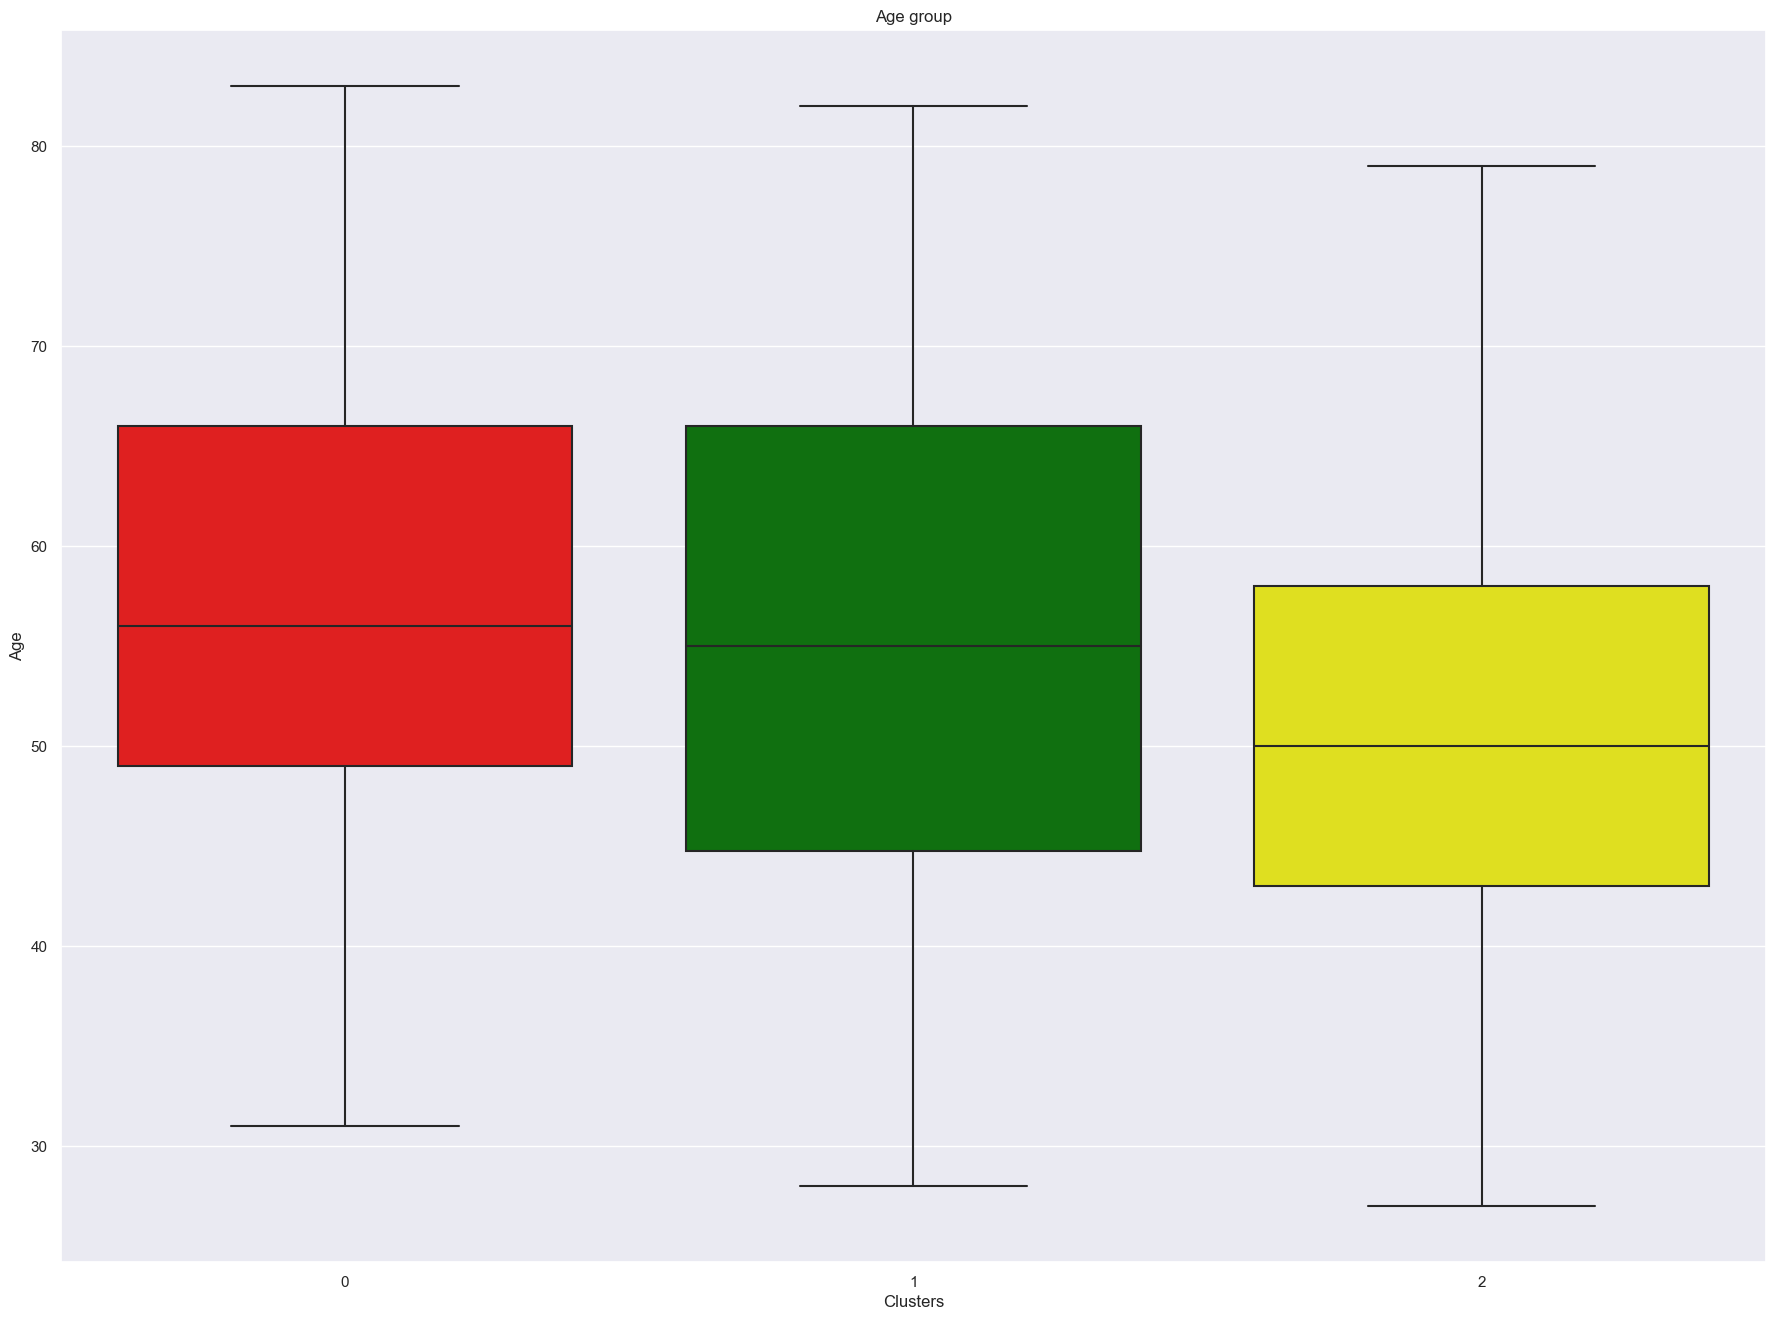

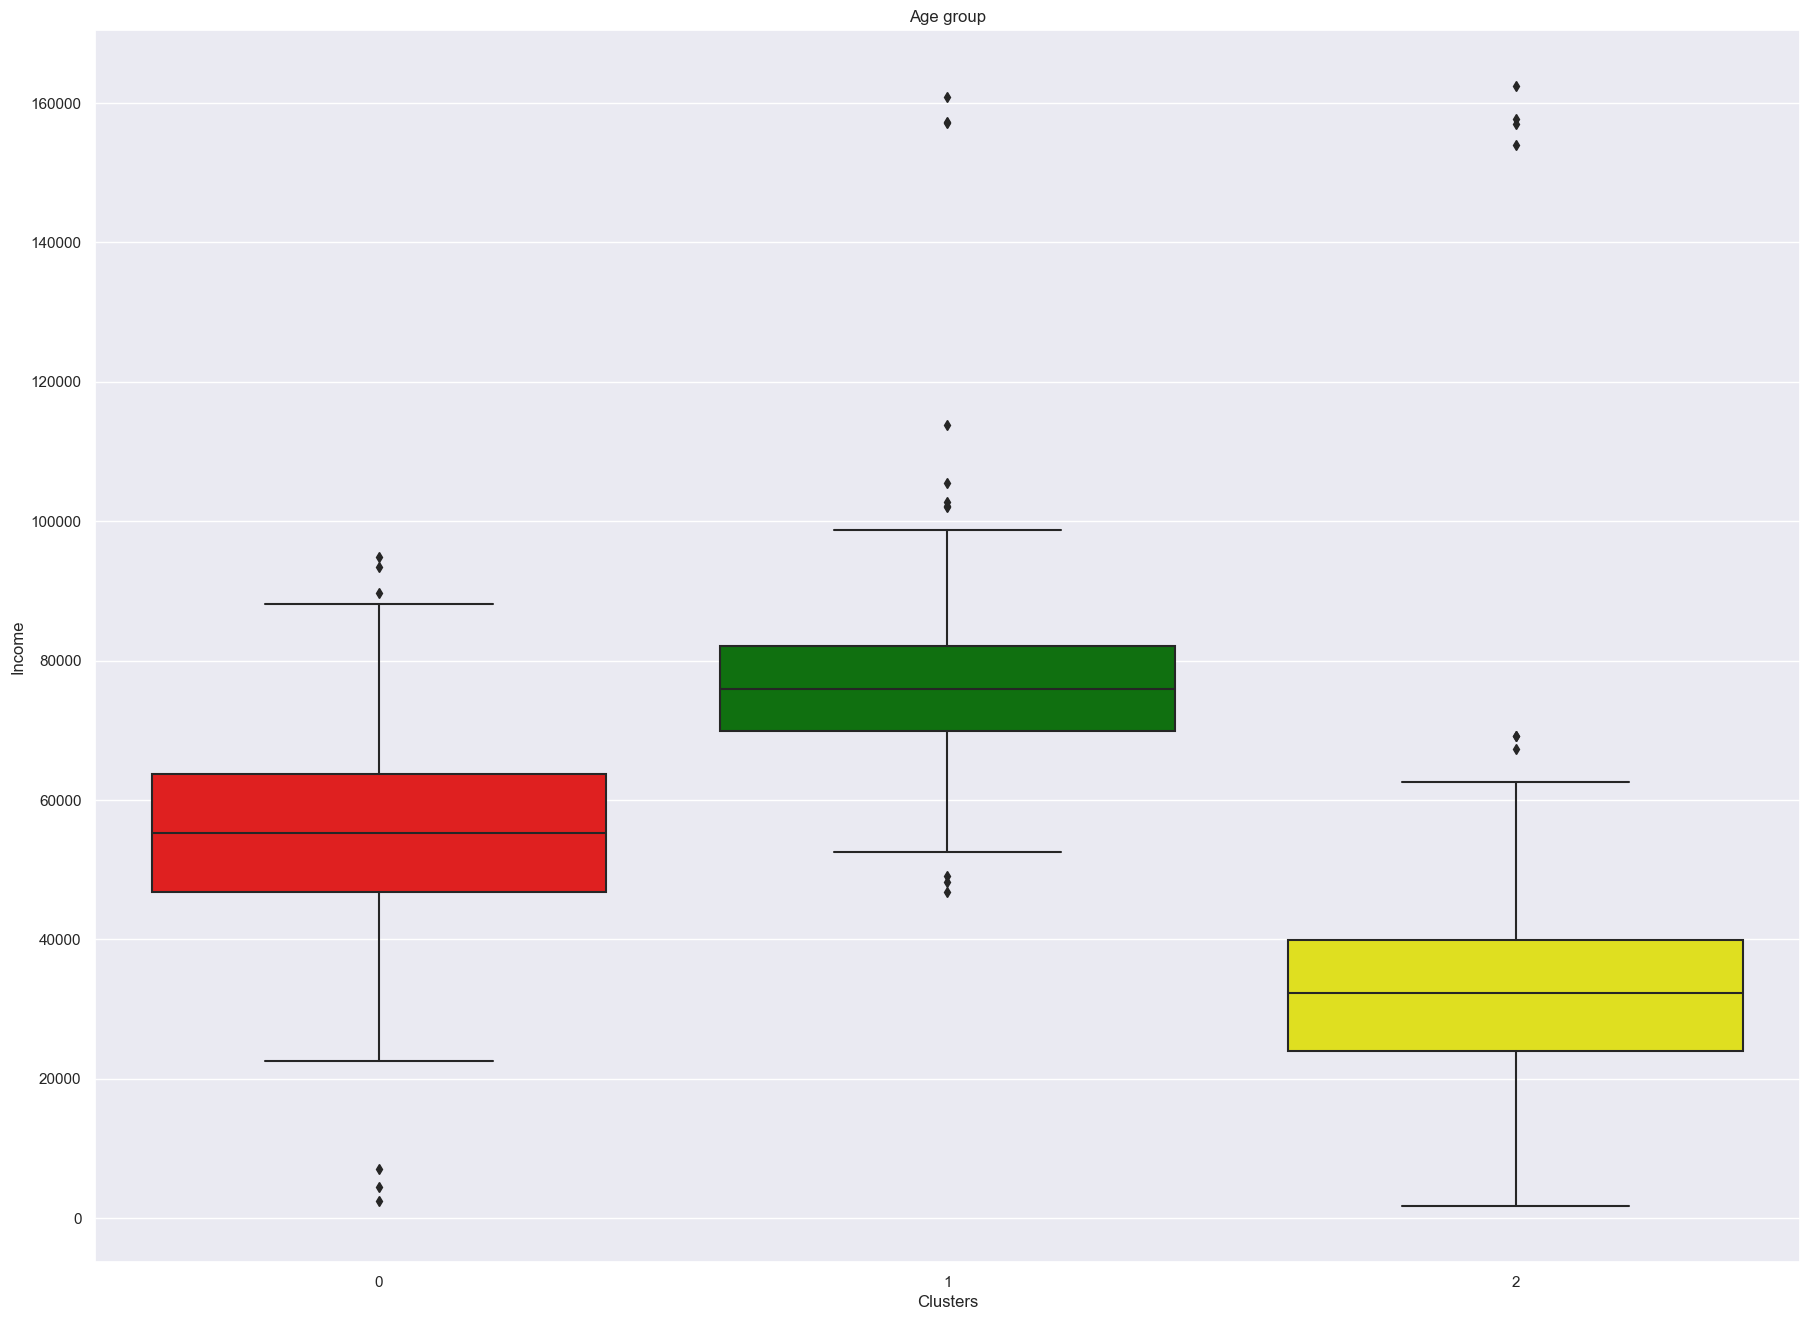

In [36]:
x = ['Age', 'Income']
for label in x:
    plt.figure()
    pl=sns.boxplot(y=data[label],x=data["Clusters"], palette= pal)
    pl.set_title("Age group")
    plt.show()

# Cluster Analysis

Let's summarize the above visualizations of clusters on the basis of different variables.

__Cluster 0__ : Mid-income(Average income of about $5700); Age range(late forties to almost seventies); Likely to accept promo deals; Average of 1 kid; Mostly married; Mid-range spender; Mostly spends on wine and gold.

__Cluster 1__ : Highest income(Average income of about $7200); Age range(mid forties to mid-sixties); Not particulary inclined to promo deals; Average 0 kid; A good mix of married and single; Spends most at this store; Mostly spends on wine,fruits, meat/fish


__Cluster 2__: Low-income(Average income of about $36000); Age range(early forties to mid-fifties);Mostly married;Most likely to accept promo deals; Average 1.5 kids; Least spender at this store; Mostly married;Mostly spends on fish and gold


The analysis could help the business make informed decisions. For instance, it could help the business serve its customer betetr by understanding their needs. It could also help to target the right set of customers for new products or deals. 

# Conclusion

In my final project,  I was able to delve deeper into unsupervised machine learning model. I also learnd more about dimension reduction as well as clustering methods. Through this project, I was able to perform clustering but also tried using data visualization to analyze the clusters. 

One thing I realized after completing the project was that everytime I ran the model, it gave me different results. Upon researching, I found that clustering algorithms use random initialization so everytime they give different results. In order to produce stable results, I set the linakge parameter in my clustering to produce stable results.

# Acknowledgements

I would like to thank Dr. Allen for helping me with my data analysis especially converting my project into a presentation. 

## References

http://localhost:8888/notebooks/Desktop/DSC%20305/Labs/Lab0/Lab0.ipynb - Dr.Allen's Lab 0
https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient
https://www.geeksforgeeks.org/difference-between-k-means-and-hierarchical-clustering/
https://www.kaggle.com/code/alisultanov/clustering-customer-personality-analysis